# <p style="padding:20px;background-color:#ffe7a0;margin:0;color:(0,0,0);font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">ARIMA MODEL</p>

## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">AN INTRODUCTION TO ARIMA MODEL THEORY</p>

<a class="anchor" id="0.1"></a>
### Table of Contents
+ [**1. Giới thiệu về Time Series**](#1)
    + [1.1 Khái niệm Time Series](#1.1)
    + [1.2 Các thành phần trong Time Series](#1.2)
    + [1.3 Ứng dụng](#1.3)
    + [1.4 Stationarity Tests in Time Series](#1.4)
+ [**2. Mô hình ARIMA**](#2)
    + [2.1 Giới thiệu mô hình ARIMA](#2.1)
    + [2.2 Các thành phần trong ARIMA model](#2.2)
    + [2.3 Công thức ARIMA model](#2.3)
    + [2.4 Lựa chọn tham số ARIMA (p, d, q)](#2.4)
    + [2.5 Giới thiệu phương pháp auto ARIMA](#2.5)
    + [2.6 Mô hình ARIMA mùa vụ (Seasonal ARIMA - SARIMA)](#2.6)
        + [2.6.1 Kiểm tra yếu tố mùa vụ](#2.6.1)
        + [2.6.2 Công thức](#2.6.2)
        + [2.6.3 Xây dựng mô hình SARIMA](#2.6.3)
    + [2.7 Mô hình ARIMAX và SARIMAX](#2.7)
        + [2.7.1 Giới thiệu](#2.7.1)
        + [2.7.2 Công thức](#2.7.2)
        + [2.7.3 Xây dựng mô hình ARIMAX và SARIMAX](#2.7.3)
    + [2.8 Xác định độ chính xác của mô hình](#2.8)
+ [**3. Ưu và khuyết điểm của mô hình ARIMA**](#3)
    + [3.1 Ưu điểm](#3.1)
    + [3.2 Khuyết điểm](#3.2)
+ [**4. Kết luận**](#4)
+ [**5. Câu hỏi ôn tập**](#5)

## 1. Giới thiệu về Time Series <a class="anchor" id="1"></a>
[**Table of Contents**](#0.1)

### 1.1 Khái niệm Time Series <a class="anchor" id="1.1"></a>
Chuỗi thời gian (**Time series**) là một chuỗi các điểm dữ liệu xảy ra theo thứ tự liên tiếp trong một khoảng thời gian. Một chuỗi thời gian sẽ theo dõi chuyển động của các điểm dữ liệu đã chọn (chẳng hạn như giá của chứng khoán) trong một khoảng thời gian xác định.

Ứng dụng của chuỗi thời gian trải khắp các ngành công nghiệp khác nhau như: quan sát hoạt động sóng điện trong não, đo lượng mưa, dự báo giá cổ phiếu, theo dõi doanh số bán lẻ hàng năm, người đăng ký hàng tháng, nhịp tim mỗi phút,...

Dữ liệu chuỗi thời gian là tập hợp các quan sát thu được thông qua các phép đo lặp lại theo thời gian. Dữ liệu chuỗi thời gian ở khắp mọi nơi, vì thời gian là thành phần của mọi thứ mà chúng ta có thể nhận biết được.

Dự báo chuỗi thời gian là một lớp mô hình quan trọng trong thống kê, kinh tế lượng và machine learning. Sở dĩ chúng ta gọi lớp mô hình này là chuỗi thời gian (time series) là vì mô hình được áp dụng trên các chuỗi đặc thù có yếu tố thời gian. Một mô hình chuỗi thời gian thường dự báo dựa trên giả định rằng các qui luật trong quá khứ sẽ lặp lại ở tương lai. Do đó xây dựng mô hình chuỗi thời gian là chúng ta đang mô hình hóa mối quan hệ trong quá khứ giữa biến độc lập (biến đầu vào) và biến phụ thuộc (biến mục tiêu). Dựa vào mối quan hệ này để dự đoán giá trị trong tương lai của biến phụ thuộc.

Do là dữ liệu chịu ảnh hưởng bởi tính chất thời gian nên chuỗi thời gian thường xuất hiện những qui luật đặc trưng như : yếu tố chu kỳ, mùa vụ và yếu tố xu hướng. Đây là những đặc trưng thường thấy và xuất hiện ở hầu hết các chuỗi thời gian.

### 1.2 Các thành phần trong Time Series <a class="anchor" id="1.2"></a>
**Các thành phần trong Time Series:**

**Trend**
+ Hướng chung của dữ liệu theo thời gian. Tăng hoặc giảm dài hạn trong dữ liệu. Có thể được xem như là một độ dốc - slope (không phải là tuyến tính) gần như đi xuyên qua dữ liệu. Ví dụ, nếu chúng ta đang xem xét chiều cao của một đứa trẻ sơ sinh, chiều cao của chúng sẽ theo xu hướng tăng lên khi chúng còn nhỏ. Mặt khác, một người nào đó trong chương trình giảm cân thành công sẽ thấy cân nặng của họ có xu hướng giảm dần theo thời gian.

**Seasonality + Cycles**
+ Bất kỳ mẫu theo mùa hoặc lặp lại với tần suất cố định. Có thể là hàng giờ, hàng tháng, hàng ngày, hàng năm, v.v. Một chuỗi thời gian được cho là thời vụ khi nó bị ảnh hưởng bởi các yếu tố theo mùa (giờ trong ngày, tuần, tháng, năm, ...). Tính thời vụ có thể được quan sát với các mẫu chu kỳ (cyclical patterns) có tần số cố định (fixed frequency). Một ví dụ về điều này là doanh số bán áo khoác mùa đông tăng trong những tháng mùa đông và giảm trong những tháng mùa hè. Một ví dụ khác về điều này có thể là số dư tài khoản ngân hàng của bạn. Trong 10 ngày đầu mỗi tháng, số dư của bạn có xu hướng giảm khi bạn trả tiền thuê hàng tháng, tiền điện nước và các khoản thanh toán hóa đơn khác.
+ Một chu kỳ xảy ra khi dữ liệu biểu hiện tăng và giảm không có tần số cố định. Những biến động này thường là do điều kiện kinh tế và thường liên quan đến "Business cycle". Thời gian của những biến động này thường ít nhất là 2 năm.

**Irregularities + Noise**
+ Bất kỳ điểm đột biến hoặc điểm lõm lớn nào trong dữ liệu. Một ví dụ về điều này có thể là nhịp tim của bạn khi bạn chạy đường chạy 400 mét. Khi bạn bắt đầu cuộc đua, nhịp tim của bạn tương tự như nhịp tim trong suốt cả ngày, nhưng trong suốt cuộc đua, nó tăng vọt lên mức cao hơn nhiều trong một khoảng thời gian ngắn trước khi trở lại mức bình thường.

**Residuals**: Mỗi chuỗi thời gian có thể được phân tách thành hai phần:
+ **Forecast**: bao gồm một hoặc một số giá trị dự báo (forecasted values)
+ **Residuals**: sự khác biệt giữa một quan sát (observation) và giá trị được dự đoán của nó ở mỗi time step.
    
    $$ \text{Value of series at time t = (Predicted value at time t) + (Residual at time t)} $$

### 1.3 Ứng dụng <a class="anchor" id="1.3"></a>
+ Phân tích chuỗi thời gian (Time series analysis) có thể được sử dụng trong vô số ứng dụng kinh doanh để dự báo số lượng trong tương lai và giải thích các mô hình lịch sử của nó. Ví dụ các trường hợp ứng dụng:
    + Giải thích các mô hình theo mùa trong bán hàng.
    + Dự đoán số lượng khách hàng đến hoặc đi dự kiến.
    + Ước tính ảnh hưởng của một sản phẩm mới ra mắt về số lượng bán.
    + Phát hiện các sự kiện bất thường và ước tính mức độ ảnh hưởng của chúng.
    
### 1.4 Stationarity Tests in Time Series <a class="anchor" id="1.4"></a>
### ADF test
ADF test is used to determine the presence of unit root in the series, and hence helps in understanding if the series is stationary or not. The null and alternate hypothesis of this test are:
+ **Null Hypothesis:** The series has a unit root, meaning it is non-stationary. It has some time dependent structure.
+ **Alternate Hypothesis:** The series has no unit root, meaning it is stationary. It does not have time-dependent structure.

If the null hypothesis failed to be rejected, this test may provide evidence that the series is non-stationary.

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

### KPSS test
The null and alternate hypothesis for the KPSS test is opposite that of the ADF test.
+ **Null Hypothesis:** The process is trend stationary.
+ **Alternate Hypothesis:** The series has a unit root (series is not stationary).

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (non-stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (stationary).

**When applying those tests the following outcomes are possible:**

**Case 1:** Both tests conclude that the series is not stationary - The series is not stationary

**Case 2:** Both tests conclude that the series is stationary - The series is stationary

**Case 3:** KPSS indicates stationarity and ADF indicates non-stationarity - The series is trend stationary. Trend needs to be removed to make series strict stationary. The detrended series is checked for stationarity.

**Case 4:** KPSS indicates non-stationarity and ADF indicates stationarity - The series is difference stationary. Differencing is to be used to make series stationary. The differenced series is checked for stationarity.

## 2. Mô hình ARIMA <a class="anchor" id="2"></a>
[**Table of Contents**](#0.1)

### 2.1 Giới thiệu mô hình ARIMA <a class="anchor" id="2.1"></a>
ARIMA (Auto Regressive Integrated Moving Average) là một lớp mô hình dự đoán phổ biến và linh hoạt sử dụng thông tin lịch sử để đưa ra dự đoán. Loại mô hình này là một kỹ thuật dự đoán cơ bản có thể được sử dụng làm nền tảng cho các mô hình phức tạp hơn.

**Types of ARIMA Model**:
+ **ARIMA**: Non-seasonal Autoregressive Integrated Moving Averages
+ **SARIMA**: Seasonal ARIMA
+ **SARIMAX**: Seasonal ARIMA with exogenous variables

### Ghi chú:
+ ARIMA được ứng dụng thường xuyên cho các dãy dữ liệu theo thời gian ổn định (Stationary time series).
+ Trong thống kê, dữ liệu thời gian ổn định là dữ liệu mà các chỉ số thống kế không đổi (trung bình, phương sai, hệ số tương quan, ...) theo thời gian.
+ Khi trung bình và phương sai có xu hướng biến chuyển theo thời gian thì sẽ có dữ liệu bất ổn định (non-stationary time series). Lúc này chúng ta phải tính bậc (order) của `d` để có được dữ liệu ổn định.
+ Nếu mô hình có thành phần theo mùa, chúng ta sử dụng mô hình ARIMA theo mùa (SARIMA). Trong trường hợp đó, sẽ có một bộ tham số khác: P, D và Q mô tả các liên kết tương tự như p, d và q nhưng tương ứng với các thành phần theo mùa của mô hình (Seasonal Model).

### 2.2 Các thành phần trong ARIMA model <a class="anchor" id="2.2"></a>
Mô hình ARIMA là viết tắt của "Auto-Regressive Integrated Moving Average" và có thể được chia thành **AR, I, MA**.

+ **AR(p) Autoregression** – a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.An auto regressive (AR(p)) component refers to the use of past values in the regression equation for the time series.
+ **I(d) Integration** – uses differencing of observations (subtracting an observation from observation at the previous time step) in order to make the time series stationary. Differencing involves the subtraction of the current values of a series with its previous values d number of times.
+ **MA(q) Moving Average** – a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations. A moving average component depicts the error of the model as a combination of previous error terms. The order q represents the number of terms to be included in the model.

+ Trong mô hình ARIMA có 3 tham số được sử dụng để giúp mô hình hoá các khía cạnh chính của một chuỗi thời gian: seasonality, trend và noise. Các tham số này được gắn nhãn lần lượt là p, d và q.
+ Một mô hình ARIMA thường được ghi là `ARIMA(p,d,q)`.
+ **Trong đó:**
    + `p`: là tham số kết hợp với khía cạnh tự động hồi quy của mô hình (auto-regressive aspect - AR), kết hợp các giá trị trong quá khứ mang tính chất lâu dài (giá trị quan sát hiện tại phụ thuộc vào các giá trị trước đó). (Tổng trọng số của các giá trị độ trễ của series). **Ví dụ**: Dự báo rằng nếu trời mưa nhiều trong vài ngày qua, có thể cho biết ngày mai trời sẽ mưa.
    + `d` (difference): là tham số kết hợp với phần tích hợp của mô hình (integrated part - I), nó ảnh hưởng đến lượng chênh lệch áp dụng cho một chuỗi thời gian (Sự khác biệt của time series). **Ví dụ**: Dự báo rằng lượng mưa ngày mai sẽ tương tự như lượng mưa ngày hôm nay, nếu lượng mưa hàng ngày tương tự trong vài ngày qua.
    + `q`: là tham số liên quan đến phần trung bình động của mô hình (moving average part - MA, các số liệu phụ thuộc nhau trong một khoảng thời gian ngắn). (Tổng số các lỗi dự báo bị trễ của series)

### a. Autoregressive Component - AR(p)
Thành phần tự hồi quy (autoregressive component) của mô hình ARIMA được đại diện bởi AR(p), với tham số `p` xác định số chuỗi bị trễ mà chúng tôi sử dụng.

$$AR(p) = \phi_0 + {\phi_1}{x_{t-1}} + {\phi_2}{x_{t-1}} + ... + {\phi_p}{x_{t-p}}$$

**AR(0): White Noise**
+ Nếu chúng ta đặt tham số `p` là 0 (AR(0)), không có số hạng tự hồi quy. Chuỗi thời gian này chỉ là White Noise.
+ Mỗi điểm dữ liệu được lấy mẫu từ một phân phối có giá trị trung bình bằng 0 và phương sai của bình phương sigma.
+ Điều này dẫn đến một dãy số ngẫu nhiên không thể dự đoán được.
+ Điều này thực sự hữu ích vì nó có thể đóng vai trò là một giả thuyết vô hiệu và bảo vệ các phân tích của chúng tôi khỏi việc chấp nhận các mẫu dương tính giả (false-positive).

**AR(1): Random Walks and Oscillations**
+ Với tham số p được đặt thành 1, chúng tôi đang tính đến dấu thời gian (timestamps) trước đó được điều chỉnh theo hệ số nhân, sau đó thêm nhiễu trắng.
+ Nếu hệ số nhân bằng 0 thì chúng ta nhận được White Noise và nếu hệ số nhân là 1 thì chúng ta sẽ có bước đi ngẫu nhiên (Random Walks).
+ Nếu hệ số nhân nằm trong khoảng từ $0 < {\alpha_1} < 1$, thì chuỗi thời gian sẽ thể hiện độ đảo ngược trung bình. Điều này có nghĩa là các giá trị có xu hướng xoay quanh 0 và trở lại giá trị trung bình sau khi hồi quy từ nó.

**AR(p): Higher-order terms**
+ Tăng tham số p hơn nữa chỉ có nghĩa là quay trở lại xa hơn và thêm nhiều dấu thời gian (timestamps) hơn được điều chỉnh bởi hệ số riêng của chúng.
+ Chúng ta có thể quay lại bao xa tùy ý, nhưng khi quay lại xa hơn, có nhiều khả năng chúng ta nên sử dụng các tham số bổ sung như đường trung bình động (MA(q)).

### b. Moving Average - MA(q)
"This component is not a rolling average, but rather the lags in the white noise."

$$\text{MA(q)} = \mu + \sum_{i=1}^q{\theta_i}{\epsilon_{t-i}} $$

**MA(q)**
+ MA(q) là mô hình trung bình động và q là số thuật ngữ lỗi dự báo bị trễ trong dự đoán.
+ Trong mô hình MA(1), dự báo của chúng tôi là một số hạng không đổi cộng với số hạng nhiễu trắng trước đó nhân với một số nhân, được cộng với thuật ngữ nhiễu trắng hiện tại.
+ Đây chỉ là xác suất + thống kê đơn giản vì chúng tôi đang điều chỉnh dự báo của mình dựa trên các thuật ngữ white noise trước đó.

### c. Intergrated (d)
Intergrated là quá trình đồng tích hợp hoặc lấy sai phân. Yêu cầu chung của các thuật toán trong time series là chuỗi phải đảm bảo tính dừng. Hầu hết các chuỗi đều tăng hoặc giảm theo thời gian. Do đó yếu tố tương quan giữa chúng chưa chắc là thực sự mà là do chúng cùng tương quan theo thời gian. Khi biến đổi sang chuỗi dừng, các nhân tố ảnh hưởng thời gian được loại bỏ và chuỗi sẽ dễ dự báo hơn. Để tạo thành chuỗi dừng, một phương pháp đơn giản nhất là chúng ta sẽ lấy sai phân. Một số chuỗi tài chính còn qui đổi sang logarit hoặc lợi suất. Bậc của sai phân để tạo thành chuỗi dừng còn gọi là bậc của quá trình đồng tích hợp (order of intergration). Quá trình của chuỗi dữ liệu được thực hiện như sau:

$$ \text{Sai phân bậc 1: I(1)} = \Delta{x_t} = x_t - x_{t-1} $$

Thông thường chuỗi sẽ dừng sau quá trình đồng tích hợp I(0) hoặc I(1). Rất ít chuỗi chúng ta phải lấy tới sai phân bậc 2. Một số trường hợp chúng ta cần biến đổi logarit hoặc căn bậc 2 để tạo thành chuỗi dừng.

### 2.3 Công thức ARIMA model <a class="anchor" id="2.3"></a>
Phương trình hồi quy ARIMA (p, d, q) có thể được biểu diễn dưới dạng công thức toán như sau:

$$\Delta{x_t} = {\phi_1}{\Delta{t-1}} + {\phi_2}{\Delta{t-2}} + {\phi_p}{\Delta{t-p}} + {\theta_1}{\epsilon_{t-1}} + {\theta_2}{\epsilon_{t-2}} + ... + {\theta_q}{\epsilon_{t-q}} $$

Trong đó: $\Delta{x_t}$ là giá trị sai phân bậc `d` và ${\epsilon_t}$ là các chuỗi nhiễu trắng.

Như vậy về tổng quát thì ARIMA là mô hình kết hợp của 2 quá trình tự hồi qui và trung bình trượt. Dữ liệu trong quá khứ sẽ được sử dụng để dự báo dữ liệu trong tương lai. Trước khi huấn luyện mô hình, cần chuyển hóa chuỗi sang chuỗi dừng bằng cách lấy sai phân bậc 1 hoặc logarit. Ngoài ra mô hình cũng cần tuân thủ điều kiện ngặt về sai số không có hiện tượng tự tương quan và phần dư là nhiễu trắng. Đó là lý thuyết của kinh tế lượng. Còn theo trường phái machine learning thì tôi chỉ cần quan tâm đến làm sao để lựa chọn một mô hình có sai số dự báo là nhỏ nhất.

### 2.4 Lựa chọn tham số ARIMA (p, d, q) <a class="anchor" id="2.4"></a>

+ `d`: d sẽ là bậc dừng của chuỗi dữ liệu.
+ `p`: Có thể dùng **Partial Autocorrelation (PACF)** plot để xác định.
+ `q`: Có thể dùng **Autocorrelation (ACF)** plot để xác định.

Trong python, có thể trình bày nhanh cả 2 đồ thị ACF và PACF bằng cách dùng package `plot_acf`, `plot_pacf`. Để sử dụng được các package đó, ta cần import vào thư viện như sau:`from statsmodels.graphics.tsaplots import plot_acf, plot_pacf`.

### 2.5 Giới thiệu phương pháp auto ARIMA <a class="anchor" id="2.5"></a>
Chúng ta thấy rằng việc lựa chọn mô hình tốt nhất chỉ đơn thuần dựa trên chỉ số AIC, khá đơn giản. Do đó, chúng ta hoàn toàn có thể tự động thực hiện quy trình này. Trên Python đã hỗ trợ tìm kiếm mô hình ARIMA phù hợp thông qua package `auto arima`. Chúng hoạt động như một grid search mà tham số chúng ta truyền vào chỉ là có hệ số giới hạn trên của các bậc (p, d, q). Mọi việc còn lại hãy để thuật toán tự giải quyế.

Cài đặt thư viện: `pip install pmdarima`

Gọi thư viện sử dụng: `from pmdarima import auto_arima`

### 2.6 Mô hình ARIMA mùa vụ (Seasonal ARIMA - SARIMA) <a class="anchor" id="2.6"></a>
Mô hình ARIMA rất tuyệt, nhưng để đưa tính thời vụ và các biến ngoại sinh vào mô hình có thể cực kỳ hiệu quả. Vì mô hình ARIMA giả định rằng chuỗi thời gian là cố định nên chúng ta cần sử dụng một mô hình khác.

**2.6.1 Kiểm tra yếu tố mùa vụ** <a class="anchor" id="2.6.1"></a>

Trong một số chuỗi thời gian thường xuất hiện yếu tố mùa vụ (seasonal). Việc tìm ra chu kì và quy luật mùa vụ sẽ giúp cho mô hình dự báo chuẩn xác hơn. Yếu tố mùa vụ cũng không phải là một trong những yếu tố quá khó để nhận biết. Chúng ta có thể dễ dàng phát hiện ra chúng thông qua đồ thị của chuỗi.

Có thể vẻ đồ thị của chuỗi dữ liệu ra để quan sát một cách tổng quát để kiểm tra rằng dữ liệu có tính chất mùa vụ hay không. Ngoài ra, chúng ta có thể sử dụng một phép phân rã mùa vụ (seasonal decompose) để trích lọc ra các thành phần cấu thành nên chuỗi bao gồm: xu hướng (trend), mùa vụ (seasonal), phần dư (residual).


**2.6.2 Công thức** <a class="anchor" id="2.6.2"></a>

Phương trình SARIMA (p, d, q)(P, D, Q) với các bậc $\text{(P, D, Q)}$ của yếu tố mùa vụ được trích xuất từ chuỗi ban đầu.

$$y_t = c + \sum_{n=1}^p{\alpha_n}{y_{t-n}} + \sum_{n=1}^q{\theta_n}{\epsilon_{t-n}} + \sum_{n=1}^P{\phi_n}{y_{t-sn}} + \sum_{n=1}^Q{\eta_n}{\epsilon_{t-sn}} + \epsilon_t $$

+ Nhập SARIMA (ARIMA theo mùa). Mô hình này rất giống với mô hình ARIMA, ngoại trừ việc có thêm một tập hợp các thành phần trung bình động và tự hồi quy.
+ Những độ trễ bổ sung này được bù đắp bởi tần suất theo mùa (ví dụ: 12 - hàng tháng, 24 - hàng giờ).
+ Các mô hình SARIMA cho phép phân biệt dữ liệu theo tần suất theo mùa, nhưng cũng theo sự khác biệt không theo mùa.
+ Việc biết tham số nào là tốt nhất có thể được thực hiện dễ dàng hơn thông qua các khung tìm kiếm tham số tự động,  như `pmdarima`.

**2.6.3 Xây dựng mô hình SARIMA** <a class="anchor" id="2.6.3"></a>

Để mô hình hiểu được chúng ta đang hồi quy trên mô hình SARIMA thì cần thiết lập tham số `seasonal=True` và chu kì của mùa vụ `m=12`.

Trong Python, có thể dùng hàm `seasonal_decompose`. Để dùng được hàm này, cần import vào: `from statsmodels.tsa.seasonal import seasonal_decompose`

### 2.7 Mô hình ARIMAX và SARIMAX <a class="anchor" id="2.7"></a>
**2.7.1 Giới thiệu** <a class="anchor" id="2.7.1"></a>

Mô hình SARIMA có thể được bổ sung thêm các biến giải thích. Điều này dẫn đến mô hình SARIMAX (Seasonal
Autoregressive Integrated Moving Average with Exogenous Variables).

**2.7.2 Công thức** <a class="anchor" id="2.7.2"></a>

$$d_t = c + \sum_{n=1}^p{\alpha_n}{d_{t-n}} + \sum_{n=1}^q{\theta_n}{\epsilon_{t-n}} + \sum_{n=1}^r{\beta_n}{\chi_{n_t}} + \sum_{n=1}^P{\phi_n}{d_{t-sn}} + \sum_{n=1}^Q{\eta_n}{\epsilon_{t-sn}} + \epsilon_t $$

+ Phiên bản cuối cùng của mô hình ARMA là mô hình ARIMAX và SARIMAX.
+ Các mô hình này tính đến các biến ngoại sinh, hay nói cách khác, sử dụng dữ liệu bên ngoài trong dự báo của chúng tôi.

**2.7.3 Xây dựng mô hình ARIMAX và SARIMAX** <a class="anchor" id="2.7.3"></a>

Mô hình SARIMAX được xây dựng bằng cách đưa một yếu tố dự đoán bên ngoài, còn được gọi là biến ngoại sinh (exogenous variable) vào mô hình `exogenous=df[['seasonal_index']]`

### 2.8 Xác định độ chính xác của mô hình <a class="anchor" id="2.8"></a>
Sau khi đã tìm ra được mô hình ARIMA tốt nhất. Chúng ta sẽ dự báo cho khoảng thời gian tiếp theo. Dự báo cho chuỗi thời gian khá đặc thù và khác biệt so với các lớp mô hình dự báo khác vì giá trị time step liền trước sẽ được sử dụng để dự báo cho time step liền sau. Do đó đòi hỏi phải có một vòng lặp liên tiếp dự báo qua các bước thời gian. Rất may mắn là hàm `predict()` đã tự động giúp ta thực hiện việc đó. Ta sẽ chỉ phải xác định số lượng phiên tiếp theo muốn dự báo là bao nhiêu.

Chúng ta biết rằng một mô hình có thể `fit` với tập huấn luyện (train set) nhưng chưa chắc đã tốt khi dự báo. Chính vì thế cần kiểm tra chất lượng của mô hình trên tập dự báo. Trong mô hình phân loại chúng ta thường quan tâm đến tỷ lệ chính xác `accuracy`, trong trường hợp mẫu mất cân bằng thì `precision`, `recall`, `f1` là những chỉ số đo lường độ chính xác khác được thay thế. Tuy nhiên với lớp mô hình dự báo thì sẽ sử dụng một tập hợp các tham số khác liên quan đến đo lường sai số giữa giá trị dự báo và giá trị thực tế. Đó là các chỉ số: **RMSE, MAE, MAPE**.

+ **RMSE – root mean square error:**

$$ \text{RMSE} = \sqrt{{\frac{1}{n} {\sum_{t=1}^n}{e_t^2}}}$$

+ **MAPE – mean absolute percentage error:**

$$ \text{MAPE} = \frac{1}{n}{\sum_{t=1}^n}\vert{\frac{e_t}{y_t}}\vert$$

+ **MAE – mean absolute error:**

$$ \text{MAE} = \frac{1}{n}{\sum_{t=1}^n}\vert{e_t}\vert$$

**Phân loại độ chính xác của mô hình dựa trên các giá trị MAPE dựa trên Lewis (1982).**
+ MAPE <= 10%: Highly accurate.
+ 10% < MAPE <= 20%: Quite Accurate.
+ 20% < MAPE <= 50%: Moderately Accurate
+ 50% <= MAPE: Not Accurate

**Tổng hợp các thước đo độ chính xác được sử dụng để đánh giá dự báo là:**
1. **MAPE** (Mean Absolute Percentage Error): Trung bình phần trăm trị tuyệt đối sai số. Chỉ số này cho biết giá trị dự báo sai lệch bao nhiêu phần trăm so với giá trị thực tế.
2. **ME** (Mean Error): Trung bình lỗi
3. **MAE** (Mean Absolute Error): Trung bình trị tuyệt đối sai số. Chính là khoảng cách theo norm chuẩn bậc 1 giữa giá trị dự báo và giá trị thực tế.
4. **MPE** (Mean Percentage Error): Trung bình phần trăm lỗi.
5. **RMSE** (Root Mean Squared Error): Phương sai hoặc độ lệch chuẩn của chuỗi dự báo so với thực tế.
6. **ACF1** (Lag 1 Autocorrelation of Error)
7. **corr** (Correlation between the Actual and the Forecast): Tương quan giữa thực tế và dự báo.
8. **minmax** (Min-Max Error)

Thông thường, nếu bạn đang so sánh các dự báo của hai chuỗi khác nhau, MAPE, Correlation và Min-Max Error có thể được sử dụng.

**Why not use the other metrics?**

Bởi vì chỉ có ba lỗi trên là lỗi tỷ lệ phần trăm (percentage errors) thay đổi trong khoảng từ 0 đến 1. Bằng cách đó, bạn có thể đánh giá mức độ tốt của dự báo bất kể quy mô của chuỗi.

Các số liệu lỗi khác là quantities. Điều đó có nghĩa là, RMSE là 100 cho một chuỗi có giá trị trung bình là 1000 thì tốt hơn RMSE là 5 cho chuỗi là 10. Vì vậy,chúng ta không thể sử dụng chúng để so sánh dự báo của hai chuỗi thời gian được chia tỷ lệ khác nhau.

## 3. Ưu và khuyết điểm của mô hình ARIMA <a class="anchor" id="3"></a>
[**Table of Contents**](#0.1)

### 3.1 Ưu điểm <a class="anchor" id="3.1"></a>
Trong đa số trường hợp, mô hình ARIMA cho kết quả dự báo ngắn hạn đáng tin cậy nhất trong các phương pháp dự báo. Hiện nay, mô hình dự báo ARIMA được sử dụng rộng rãi ở Việt Nam và trên thế giới cho các biến số kinh tế, tài chính, ...do tính dễ sử dụng, kết quả dự báo có độ chính xác tương đối cao (trừ trường hợp các biến có độ biến động quá lớn).

### 3.2 Khuyết điểm <a class="anchor" id="3.2"></a>
Hạn chế của mô hình ARIMA đó là số quan sát cần cho dự báo phải lớn (>= 50); đối với các biến số có biến động ngắn, ARIMA không hiệu quả vì không có tính chất phản ứng nhanh. Chỉ dùng để dự báo ngắn hạn và trong điều kiện tương đối ổn định; khả năng xây dựng kịch bản của mô hình ARIMA rất hạn chế.

## 4. Kết luận <a class="anchor" id="4"></a>
[**Table of Contents**](#0.1)

Trong phần này, tôi đã giới thiệu lí thuyết về Time Series, mô hình ARIMA và các biến thể của nó: ARIMA theo mùa (SARIMA) và ARIMAX sử dụng dữ liệu bên ngoài (đầu vào ngoại sinh) để cải thiện hiệu suất của mô hình ARIMA.

Bên cạnh đó, các khái niệm cần thiết và công thức toán cũng như cách mà mô hình đó hoạt động cũng được tôi đề cập đến. Qua đó, tôi đã cung cấp một cái nhìn tổng quan nhất về thuật toán ARIMA model.

## 5. Câu hỏi ôn tập <a class="anchor" id="5"></a>
[**Table of Contents**](#0.1)

**1. Phân tích chuỗi thời gian là gì?**
+ Chuỗi thời gian là một chuỗi các quan sát được thực hiện trong các khoảng thời gian xác định, thường là các khoảng thời gian bằng nhau. Phân tích chuỗi giúp chúng ta dự đoán các giá trị trong tương lai dựa trên các giá trị được quan sát trước đó. Trong Chuỗi thời gian, chúng tôi chỉ có 2 biến, thời gian và biến chúng tôi muốn dự báo.

**2. Tại sao và ở đâu thì Chuỗi thời gian được sử dụng?**
+ Dữ liệu chuỗi thời gian có thể được phân tích để trích xuất các số liệu thống kê có ý nghĩa và các đặc điểm khác. Nó được sử dụng trong ít nhất 4 kịch bản:
    + a) Dự báo kinh doanh.
    + b) Hiểu hành vi trong quá khứ.
    + c) Hoạch định tương lai.
    + d) Đánh giá thành tích hiện tại.
    
**3. Khi nào chúng ta không nên sử dụng Phân tích chuỗi thời gian?**
+ Chúng ta không cần áp dụng Chuỗi thời gian trong ít nhất 2 trường hợp sau:
    + a) Biến phụ thuộc (y) (được cho là thay đổi theo thời gian) là hằng số. Phương trình: y=f(x)=4, một đường thẳng song song với trục x(thời gian) sẽ luôn giữ nguyên.
    + b) Biến phụ thuộc (y) đại diện cho các giá trị có thể được biểu thị dưới dạng hàm toán học. Eq: sin(x), log(x), Đa thức, v.v. Do đó, chúng ta có thể trực tiếp nhận giá trị tại một số thời điểm bằng cách sử dụng chính hàm đó. Không cần dự báo.
    
**4. Các thành phần của Chuỗi thời gian là gì?**
+ Có 4 thành phần:
    + a) Xu hướng (Trend) - Chuyển động lên và xuống của dữ liệu theo thời gian trong một khoảng thời gian lớn. Eq: Đánh giá cao của Dollar so với rupee.
    + b) Tính thời vụ (Seasonality) - phương sai theo mùa. Eq: Doanh số bán kem chỉ tăng trong mùa hè.
    + c) Nhiễu hoặc bất thường (Noise or Irregularity) - Các đỉnh và đáy ở các khoảng thời gian ngẫu nhiên.
    + d) Chu kỳ (Cyclicity) - hành vi tự lặp lại sau một khoảng thời gian dài, như tháng, năm, v.v.
    
**5. Tính dừng (Stationarity) là gì?**
+ Trước khi áp dụng bất kỳ mô hình thống kê nào trên Chuỗi thời gian, chuỗi phải ổn định, có nghĩa là, trong các khoảng thời gian khác nhau,
    + a) Nó phải có giá trị trung bình không đổi.
    + b) Nó phải có phương sai hoặc độ lệch chuẩn không đổi.
    + c) Hiệp phương sai không nên phụ thuộc vào thời gian.

Xu hướng & Tính thời vụ là hai lý do khiến Chuỗi thời gian không ổn định & do đó cần phải được điều chỉnh.

**6. Tại sao Chuỗi thời gian (TS) cần phải dừng?**
+ Đó là vì những lý do sau:
    + a) Nếu một TS có một hành vi cụ thể trong một khoảng thời gian, thì có khả năng cao là trong một khoảng thời gian khác, nó sẽ có hành vi tương tự, với điều kiện TS là tĩnh. Điều này giúp dự báo chính xác.
    + b) b) Các lý thuyết & công thức toán học hoàn thiện hơn & dễ áp dụng hơn cho TS tĩnh.
    
**7. Các phép thử để kiểm tra xem một chuỗi có đứng yên hay không**
+ Có 2 cách để kiểm tra tính dừng của TS:
    + a) **Rolling Statistics** - Vẽ đồ thị trung bình động hoặc độ lệch chuẩn động (Plot the moving avg or moving standard deviation) để xem liệu nó có thay đổi theo thời gian hay không. Đó là một kỹ thuật hình ảnh.
    + b) **ADCF Test - Augmented Dickey–Fuller test** được sử dụng để cung cấp cho chúng ta các giá trị khác nhau có thể giúp xác định tính dừng. Giả thuyết Null nói rằng một TS là không cố định. Nó bao gồm Test Statistics & một số giá trị quan trọng đối với một số mức độ tin cậy. Nếu Test Statistics nhỏ hơn các giá trị tới hạn, chúng ta có thể bác bỏ giả thuyết không và nói rằng chuỗi này là dừng. Thử nghiệm ADCF cũng cho chúng ta giá trị p. Theo giả thuyết không, giá trị thấp hơn của p là tốt hơn.
    
**8. Mô hình ARIMA là gì?**
+ ARIMA(Auto Regressive Integrated Moving Average) là sự kết hợp của 2 mô hình AR(Auto Regressive) & MA(Moving Average). Nó có 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) tương ứng xuất phát từ các thành phần AR, I & MA. Phần AR là mối tương quan giữa các khoảng thời gian trước và hiện tại. Để làm giảm noise, phần MA được sử dụng. Phần I liên kết các phần AR & MA với nhau.

**9. Làm thế nào để tìm giá trị P & Q cho ARIMA?**
+ Chúng tôi cần trợ giúp về các sơ đồ ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function). Đồ thị ACF & PACF được sử dụng để tìm giá trị P & Q cho ARIMA. Chúng ta cần kiểm tra xem giá trị nào trong trục x, đường biểu đồ giảm xuống 0 trong trục y lần đầu tiên.
    + Từ PACF(tại y=0), lấy P.
    + Từ ACF(tại y=0), lấy Q.
 
**10. Thử nghiệm ADCF là gì?**
+ Trong thống kê và kinh tế lượng, augmented Dickey–Fuller test (ADF) kiểm tra giả thuyết khống (null hypothesis) rằng một nghiệm đơn vị có mặt trong một mẫu chuỗi thời gian. Giả thuyết thay thế là khác nhau tùy thuộc vào phiên bản thử nghiệm nào được sử dụng, nhưng thường là trạng thái dừng hoặc trạng thái dừng theo xu hướng. Đây là một phiên bản mở rộng của phép thử Dickey–Fuller cho một tập hợp các mô hình chuỗi thời gian lớn hơn và phức tạp hơn.

Thống kê Augmented Dickey–Fuller (ADF) được sử dụng trong thử nghiệm, là một số âm. Nó càng phủ định, thì sự bác bỏ giả thuyết rằng có một nghiệm đơn vị ở một mức độ tin cậy nào đó càng mạnh mẽ.

p-value (0<=p<=1) phải càng thấp càng tốt. Các giá trị tới hạn ở các khoảng tin cậy khác nhau phải gần với giá trị Test statistics.

## <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">PRACTICE</p>

<a class="anchor" id="0.2"></a>
### Table of Contents
+ [**1. Load Dataset**](#11)
+ [**2. EDA and Data Visualization**](#12)
+ [**3. Checking for Stationarity**](#13)
    + [3.1 Kiểm định tính dừng của chuỗi dữ liệu gốc](#131)
    + [3.2 Data Transformation to achieve Stationarity](#132)
    + [3.3 Split Data into train and test](#133)
+ [**4. Selection Models**](#14)
    + [4.1 ARIMA Model](#141)
    + [4.2 Auto ARIMA Model](#142)
        + [4.2.1 Running ARIMA model](#1421)
        + [4.2.2 Model Diagnostics - Chẩn đoán mô hình](#1422)
        + [4.2.3 Measure Model Accuracy](#1423)
        + [4.2.4 Forecasting](#1424)
    + [4.3 SARIMA Model](#143)
        + [4.3.1 Running SARIMA model](#1431)
        + [4.3.2 Model Diagnostics - Chẩn đoán mô hình](#1432)
        + [4.3.3 Measure Model Accuracy](#1433)
        + [4.3.4 Forecasting](#1434)
    + [4.4 ARIMAX and SARIMAX Models](#144)
+ [**5. Conclusion**](#15)

**About Dataset:**
+ For this notebook, I am going to use the [**Air Passengers Dataset**](https://www.kaggle.com/datasets/rakannimer/air-passengers). This dataset contains the number of air travel passengers from the start of 1949 to the end of 1960.
+ This dataset has a positive trend and a monthly seasonality.
+ As soon as the dataset is read, the index is set to the date. This is standard practice when working with time-series data in Pandas, and makes it easy to implement ARIMA, SARIMA, and SARIMAX later in the notebook.

**Objective:** 
+ Build a model to forecast the demand(passenger traffic) in Airplanes. The data is classified in date/time and the passengers travelling per month.

## 1. Load Dataset <a class="anchor" id="11"></a>
[**Table of Contents**](#0.2)

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('AirPassengers.csv')
data = data.rename(columns = {'#Passengers':'Passengers'})
data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [3]:
# string to date format
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True)
data = data.set_index(['Month'])
data.head(5)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
data.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


## 2. EDA and Data Visualization <a class="anchor" id="12"></a>
[**Table of Contents**](#0.2)

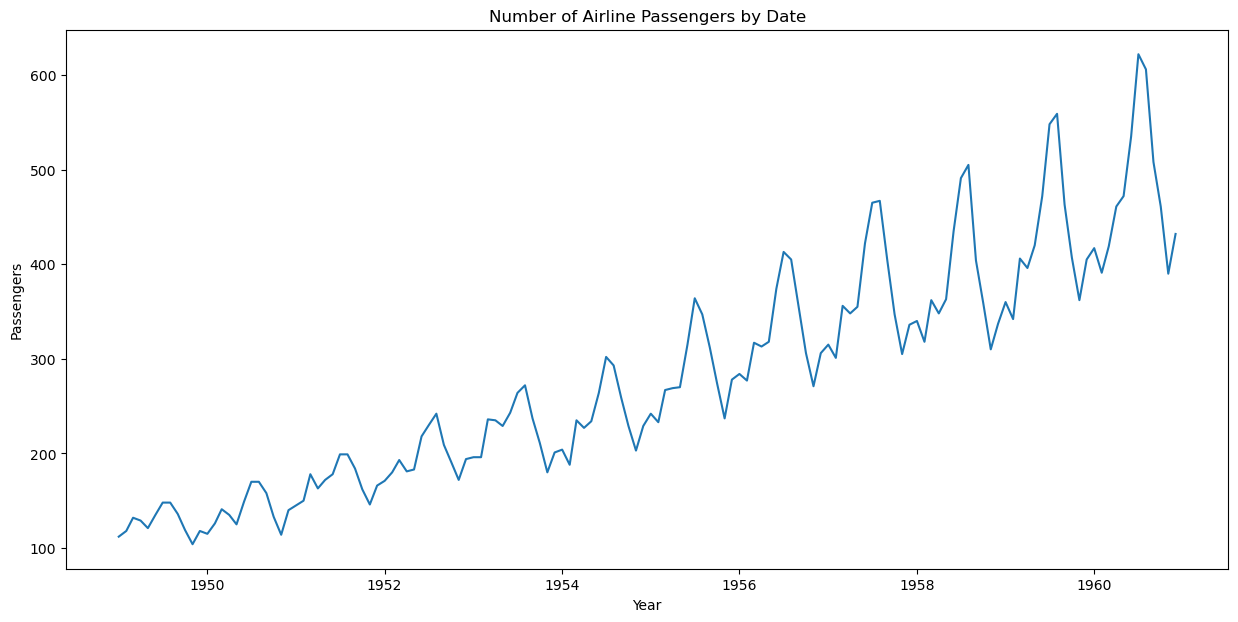

In [5]:
plt.figure(figsize=(15, 7))
plt.title("Number of Airline Passengers by Date")
plt.xlabel('Year')
plt.ylabel('Passengers')
plt.plot(data)
plt.show();

**Nhận xét:**
+ Có một xu hướng tăng (giá trị tăng theo thời gian).
+ Dường như có tính chất một mô hình theo mùa (các mô hình dự đoán lặp lại thường xuyên).
+ Tính thời vụ nhân lên (biên độ của các dao động theo mùa lớn hơn khi dữ liệu có xu hướng tăng lên).

**Kết luận:** Dữ liệu dường như không dừng và có xu hướng tăng theo thời gian.

Ta nhận thấy chuỗi có chu kì là 1 năm. Nhu cầu tiêu thụ điện và gas tăng vào những tháng mùa đông do nhu cầu sưởi ấm tăng cao. Ngoài ra chúng ta có thể sử dụng một phép phân rã mùa vụ (seasonal decompose) để trích lọc ra các thành phần cấu thành nên chuỗi bao gồm: xu hướng (trend), mùa vụ (seasonal), phần dư (residual) như bên dưới:

### Decomposition
Decomposition chủ yếu được sử dụng để phân tích chuỗi thời gian và như một công cụ phân tích, nó có thể được sử dụng để thông báo cho các mô hình dự báo về vấn đề trong dữ liệu.

Nó cung cấp một cách suy nghĩ có cấu trúc về một vấn đề dự báo chuỗi thời gian, cả về mức độ phức tạp của mô hình nói chung và cụ thể về cách nắm bắt tốt nhất từng thành phần này trong một mô hình nhất định.

Mỗi thành phần này là vấn đề có thể cần suy nghĩ và giải quyết trong quá trình chuẩn bị dữ liệu, lựa chọn mô hình và điều chỉnh mô hình. Chúng ta có thể giải quyết vấn đề một cách rõ ràng bằng cách lập mô hình xu hướng và trừ nó khỏi dữ liệu của mình bằng cách cung cấp đủ lịch sử để thuật toán lập mô hình xu hướng nếu nó có thể tồn tại.

Bạn có thể hoặc không thể chia nhỏ hoàn toàn hoặc rõ ràng chuỗi thời gian cụ thể của mình dưới dạng mô hình cộng (additive) hoặc nhân (multiplicative).

Các vấn đề dữ liệu trong thực rất rất lộn xộn và có nhiều nhiễu. Có thể có các thành phần cộng và nhân. Có thể có một xu hướng tăng theo sau một xu hướng giảm. Có thể có các chu kỳ không lặp lại trộn lẫn với các seasonality components lặp lại.

Tuy nhiên, những mô hình trừu tượng này cung cấp một khuôn khổ đơn giản mà bạn có thể sử dụng để phân tích dữ liệu của mình và khám phá các cách suy nghĩ và dự đoán vấn đề của mình.

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

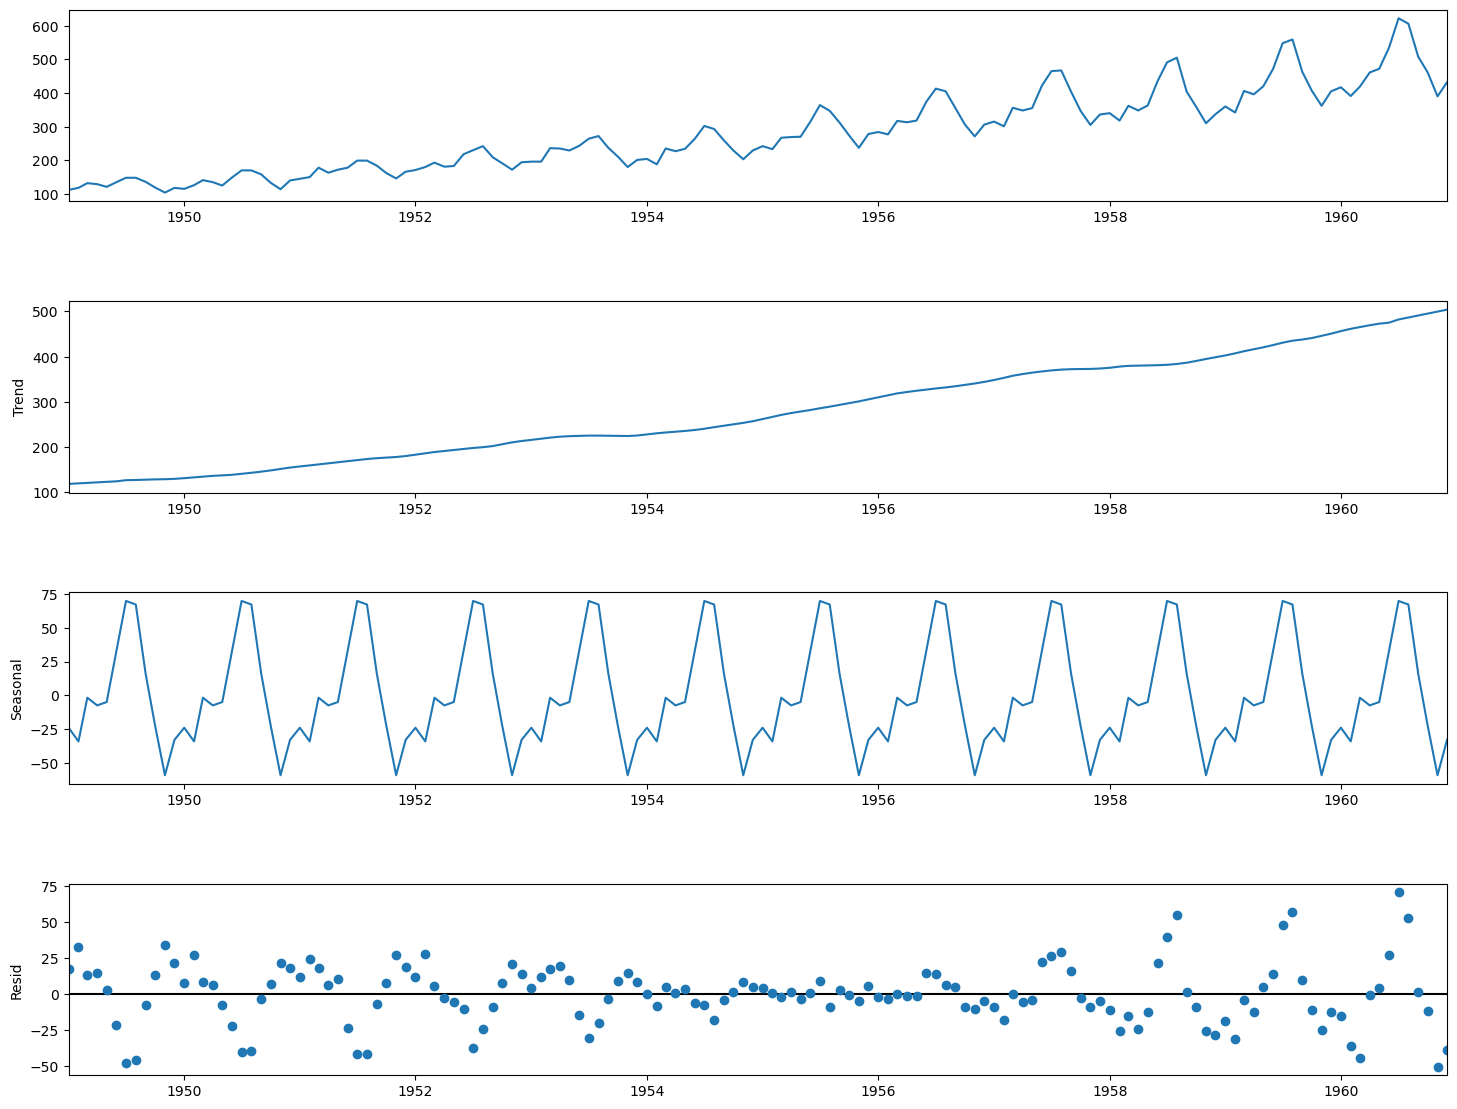

In [7]:
# Phân rã theo mô hình cộng
result = seasonal_decompose(data, model='additive', extrapolate_trend='freq')
fig = result.plot()
fig.set_size_inches(16, 12)

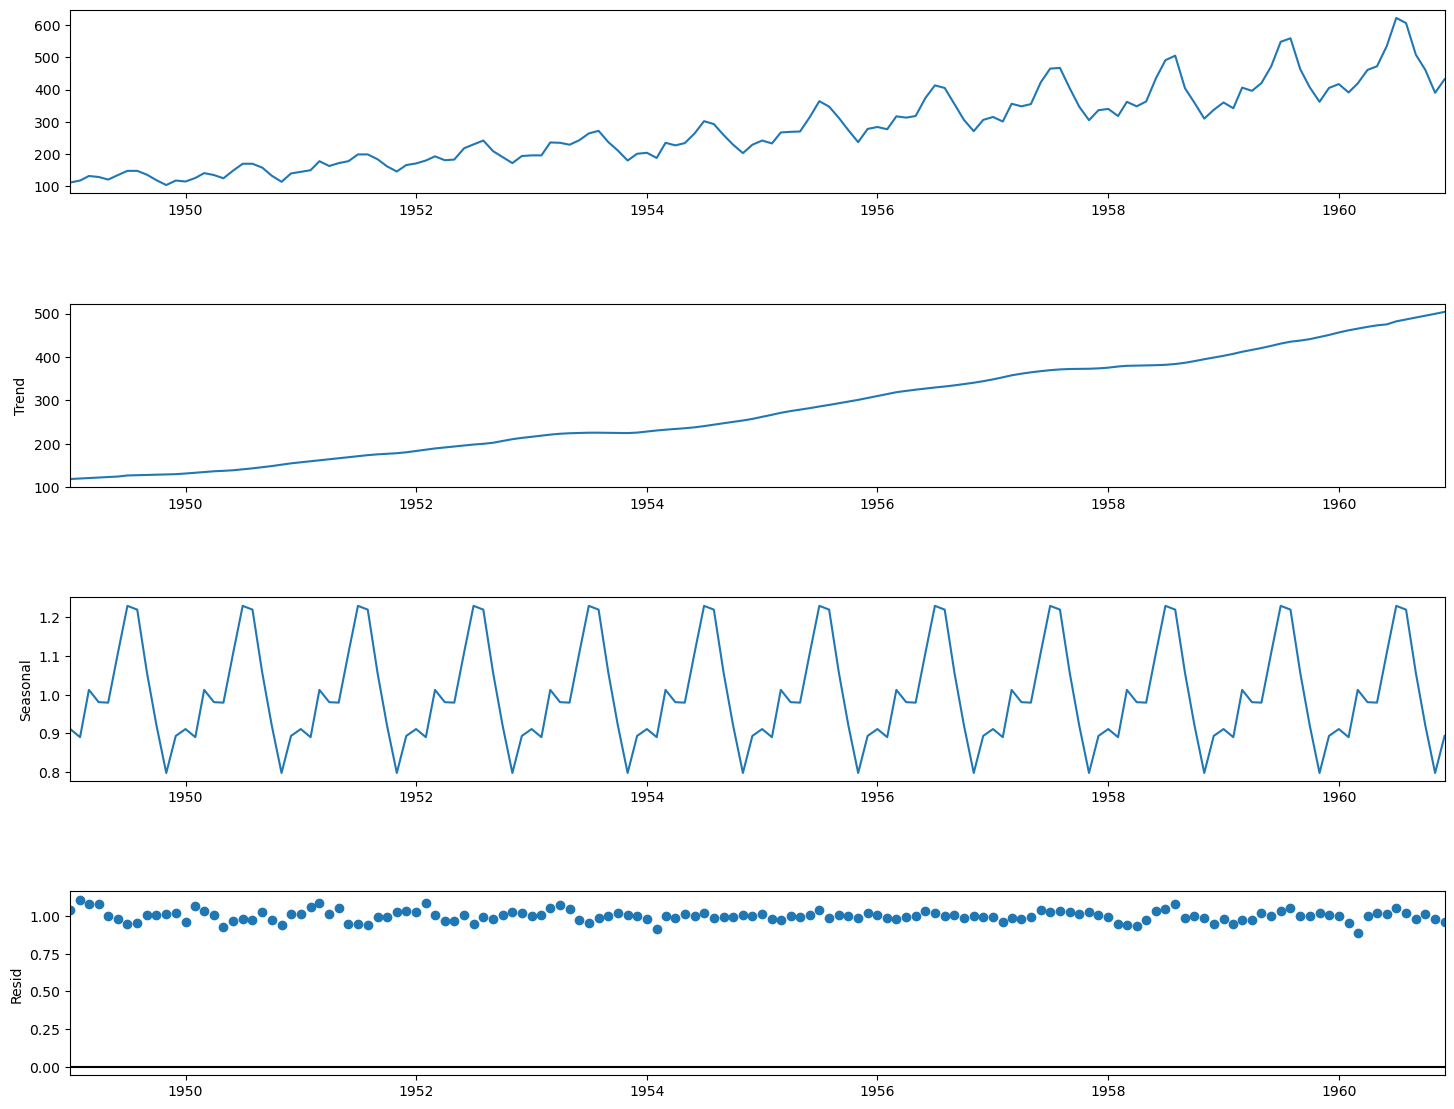

In [8]:
# Phân rã theo mô hình nhân
result = seasonal_decompose(data, model='multiplicative', extrapolate_trend='freq')
fig = result.plot()
fig.set_size_inches(16, 12)

**Rolling Statistics**

Đường trung bình động (rolling average) là một cách tuyệt vời để hình dung tập dữ liệu đang có xu hướng như thế nào. Vì bộ dữ liệu cung cấp số lượng theo tháng nên kích thước của `window` là 12 sẽ cho chúng ta mức trung bình luân phiên hàng năm.

Chúng tôi cũng sẽ bao gồm **rolling standard deviation** để xem mức độ thay đổi của dữ liệu so với mức **rolling average**.

In [9]:
def plot_graph(timeseries):
    # window size 12 denotes 12 months, giving rolling mean at yearly level
    rolling_mean = data["Passengers"].rolling(window=12).mean() 
    rolling_std = data["Passengers"].rolling(window=12).std()
    
    # Plot rolling statistics
    plt.figure(figsize=(15,7))
    plt.plot(data["Passengers"], color='#379BDB', label='Original')
    plt.plot(rolling_mean, color='#D22A0D', label='Rolling Mean')
    plt.plot(rolling_std, color='#142039', label='Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show();

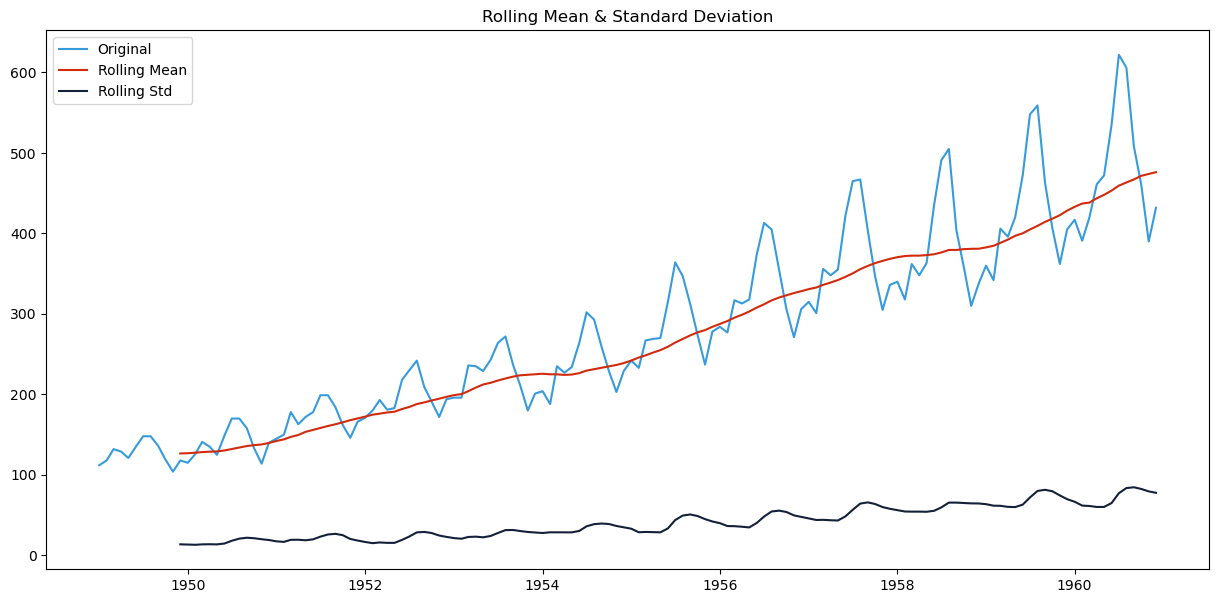

In [10]:
plot_graph(data)

**Nhận xét:**
+ Từ biểu đồ trên, chúng ta thấy rằng bản thân giá trị **rolling mean** có một thành phần xu hướng (trend component) mặc dù **rolling standard deviation** khá cố định theo thời gian. Để chuỗi thời gian của chúng ta là cố định, chúng ta cần đảm bảo rằng cả hai số liệu rolling statistics tức là: mean & std giữ nguyên theo thời gian hay không đổi theo thời gian. Do đó, các đường đồ thị của cả hai phải song song với trục x, mà trong trường hợp của chúng ta thì không phải như vậy.
+ Để củng cố thêm giả thuyết của chúng ta rằng chuỗi thời gian không dừng, chúng ta hãy thực hiện kiểm định ADF.

## 3. Checking for Stationarity <a class="anchor" id="13"></a>
[**Table of Contents**](#0.2)

Chúng ta cũng có thể sử dụng **Augmented Dickey-Fuller test (ADF)** hoặc **Kwiatkowski-Phillips-Schmidt-Shin (KPSS)** để giúp kết luận xem chuỗi có dừng hay không.

### 3.1 Kiểm định tính dừng của chuỗi dữ liệu gốc <a class="anchor" id="131"></a>
**ADF test**

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [12]:
adf_test(data['Passengers'])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**KPSS test**

In [13]:
from statsmodels.tsa.stattools import kpss
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [14]:
kpss_test(data)

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


**Nhận xét:**
+ Đối với phương pháp ADF test: `p-value` = 0.99 > 0.05 và **Test Statistic** = 0.815 > **Critical Value (5%)** = -2.88.
+ Đối với phương pháp KPSS test: `p-value` = 0.01 < 0.05 và **Test Statistic** = 1.651 > **Critical Value (5%)** = 0.463.

**Kết luận:** Chuỗi dữ liệu là **chuỗi không dừng**.

**Lưu ý:** `p-value` của ADF sẽ ngược ý nghĩa với `p-value` của KPSS.

### 3.2 Data Transformation to achieve Stationarity <a class="anchor" id="132"></a>
Có một số cách để đạt được tính ổn định thông qua chuyển đổi dữ liệu như lấy log10, loge, square, square root, v.v.

Tiếp theo, hãy bắt đầu với log transformations. Mục tiêu của chúng tôi là loại bỏ thành phần xu hướng để chuỗi dữ liệu là chuỗi dừng.
+ **Lấy Log cho dữ liệu**
+ **Lấy sai phân**
+ **Lấy sai phân log**
+ ...

**a) Lấy Log cho dữ liệu**

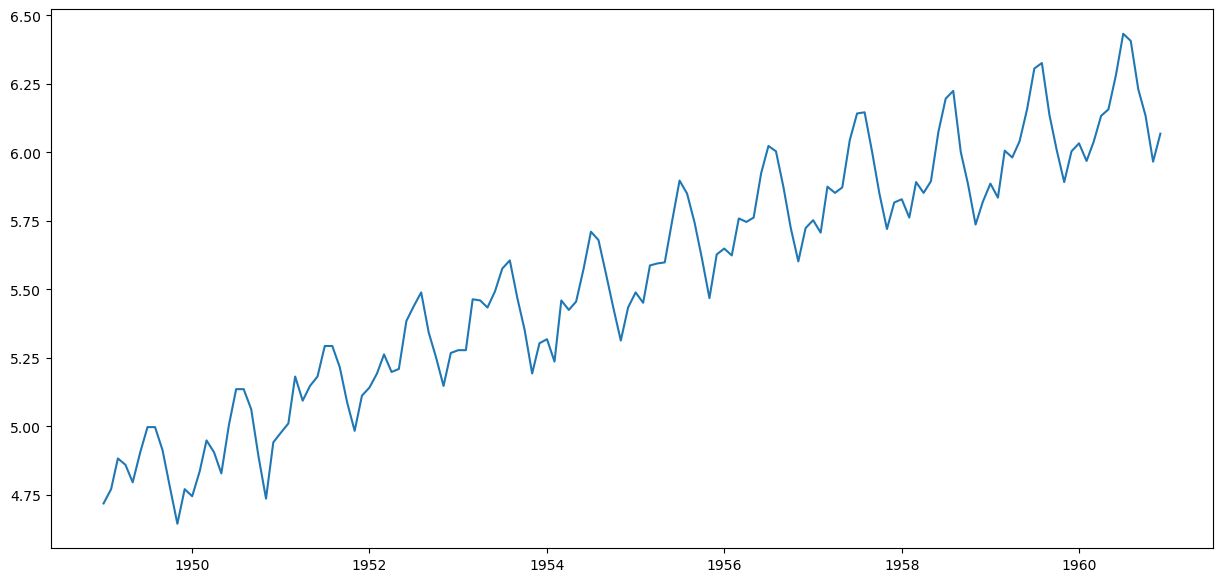

In [15]:
plt.figure(figsize=(15, 7))
data_log = np.log(data)
plt.plot(data_log);

In [16]:
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
kpss_test(data)

Results of KPSS Test:
Test Statistic           1.651312
p-value                  0.010000
Lags Used                8.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


**Nhận xét:** Lấy log nhằm giảm độ biến động, tuy nhiên chuỗi dữ liệu vẫn chưa dừng (dựa trên đồ thị vẫn có xu hướng tăng theo thời gian).

**b) Lấy sai phân**

This can be done using Differencing and it’s performed by subtracting the previous observation from the current observation.

$$ \text{difference(T) = observation(T) – observation(T-1)}$$

Sau đó, chúng tôi sẽ kiểm tra lại tính ổn định của dữ liệu bằng cách sử dụng Augmented Dickey-Fuller test và nếu dữ liệu là đứng yên, chúng tôi sẽ tiến hành bước tiếp theo. Nếu không, chúng tôi sẽ áp dụng lại differencing cho đến khi chúng tôi có một chuỗi cố định. Sự khác biệt có thể được thực hiện rất dễ dàng với `pandas` bằng cách sử dụng hàm shift.

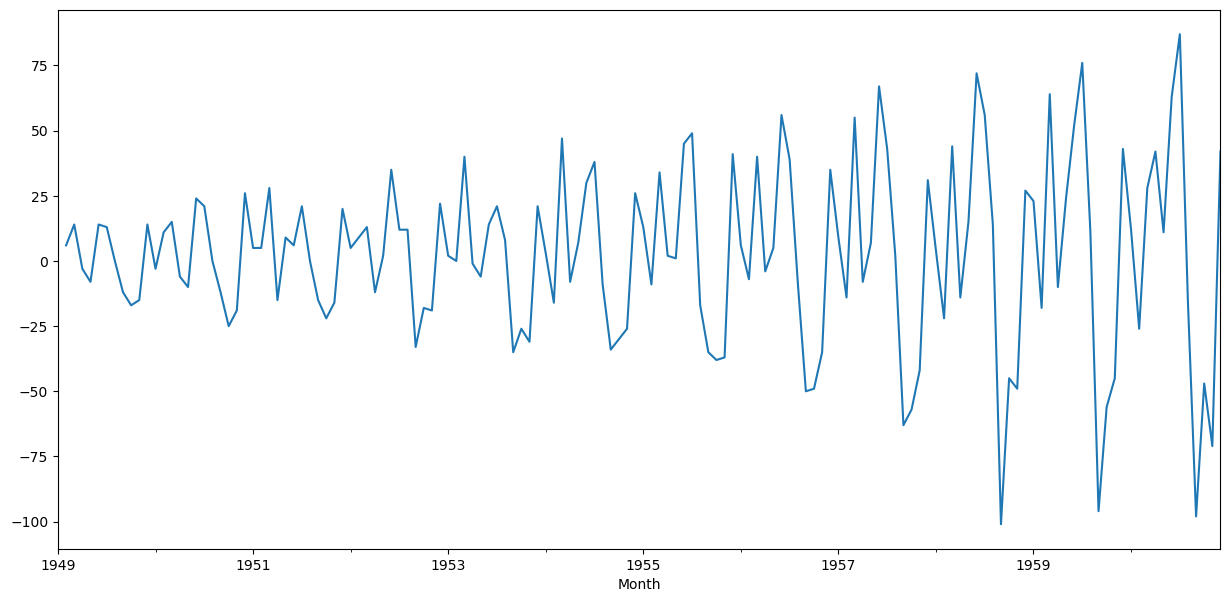

In [18]:
plt.figure(figsize=(15, 7))
data['difference1'] = data['Passengers'] - data['Passengers'].shift(1)
data['difference1'].plot();

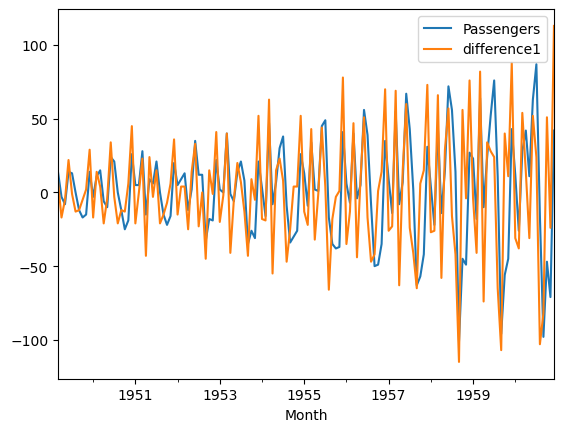

In [19]:
# Cách khác để lấy sai phân
df_train_diff = data.diff().dropna()
df_train_diff.plot();

In [20]:
adf_test(data['difference1'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -2.829267
p-value                          0.054213
#Lags Used                      12.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [21]:
kpss_test(data['difference1'].dropna())

Results of KPSS Test:
Test Statistic           0.023898
p-value                  0.100000
Lags Used                7.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**Nhận xét:** Như bạn có thể thấy, chúng tôi không bác bỏ giả thuyết không vì chúng tôi có giá trị p > 0,05. Điều đó cho thấy rằng chuỗi không cố định và chúng ta cần sử dụng lại phép sai phân để lấy sai phân bậc hai. Sai phân bậc hai có thể được tính như lần đầu tiên nhưng lần này thay vì sử dụng các quan sát gốc, chúng tôi sẽ sử dụng dữ liệu của sai phân bậc 1.

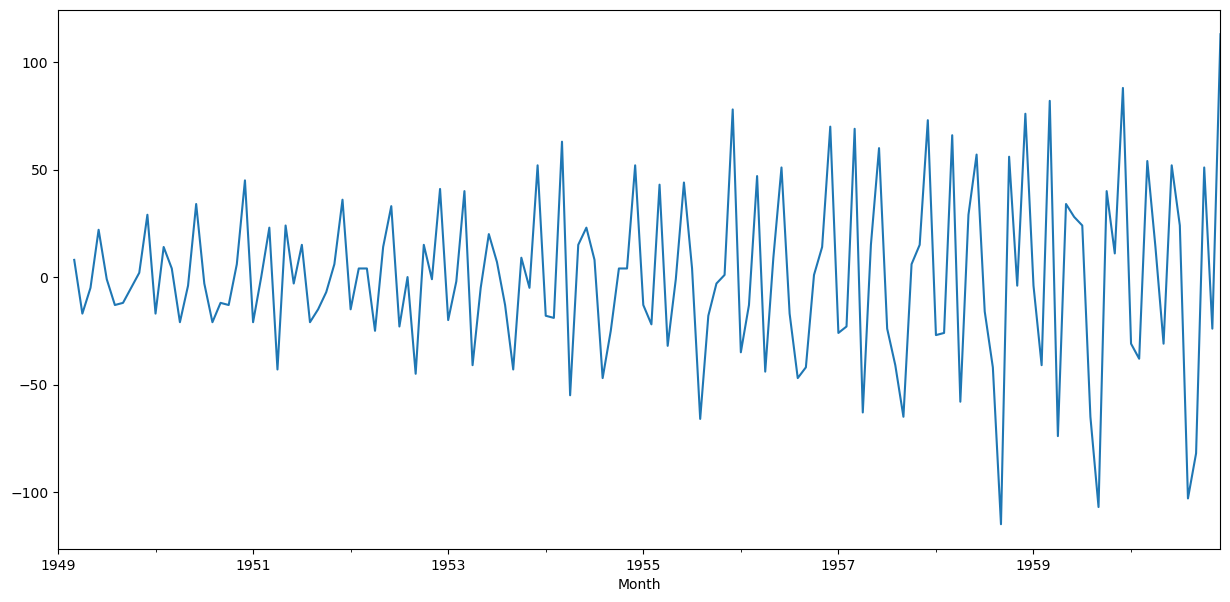

In [22]:
plt.figure(figsize = (15, 7))
data['difference2'] = data['difference1'] - data['difference1'].shift(1)
data['difference2'].plot();

In [23]:
adf_test(data['difference2'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


In [24]:
kpss_test(data['difference2'].dropna())

Results of KPSS Test:
Test Statistic            0.134671
p-value                   0.100000
Lags Used                30.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**Nhận xét:** p-value < 0.05. Do đó, dữ liệu là chuỗi dừng.

**c) Lấy sai phân log**

Để thuận tiện cho việc xây dựng mô hình ARIMA ta sẽ chuyển chuỗi data sang chuỗi dừng bằng cách lấy lợi suất theo công thức sai phân bậc 1 của logarit như bên dưới:

$$ r_t = log(\frac{x_t}{x_{t-1}})$$
 
Mục tiêu của mô hình sẽ là dự báo chuỗi . Từ chuỗi ta có thể dễ dàng biến đổi ngược lại thành số lượng Passengers của chuỗi dữ liệu gốc.

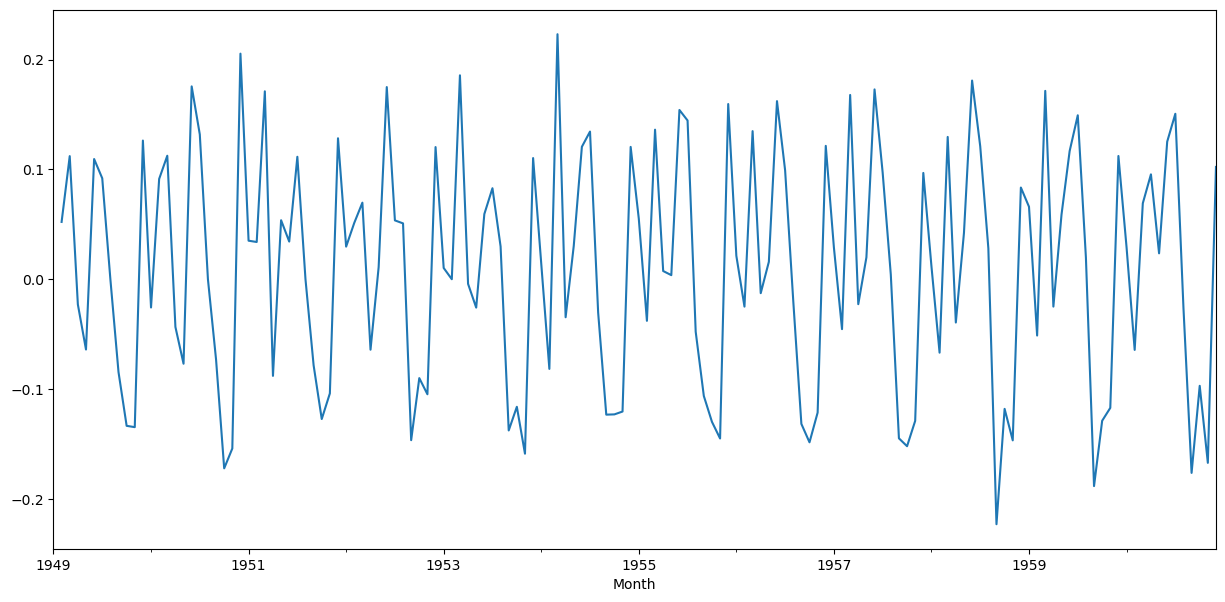

In [25]:
data['diff_log'] = np.log(data['Passengers']/data['Passengers'].shift(1))

# mean = np.nanmean(diff_log)
# diff_log[0] = mean

plt.figure(figsize = (15, 7))
data['diff_log'].plot();

In [26]:
adf_test(data['diff_log'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [27]:
kpss_test(data['diff_log'].dropna())

Results of KPSS Test:
Test Statistic           0.038304
p-value                  0.100000
Lags Used                6.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


**Nhận xét:** Dùng chuỗi sai phân log không cho kết quả tốt hơn. Do đó, chúng ta sử dụng chuỗi sai phân bậc 2 cho các kiểm định tiếp theo.

Our data are seasonal so we need to estimate also the D value which is the same as the d value but for Seasonal Difference. The seasonal difference can be computed by shifting the data by the number of rows per season (in our example 12 months per year) and subtracting them from the previous season. This is not the first seasonal difference. If we get that the seasonal difference is stationary then the D value will be 0. If not then we will compute the seasonal first difference.

$$ \text{seasonal difference(T) = observation(T) – observation(T-12)}$$

$$ \text{seasonal first difference(T) = seasonal difference(T) – seasonal difference(T-1)}$$

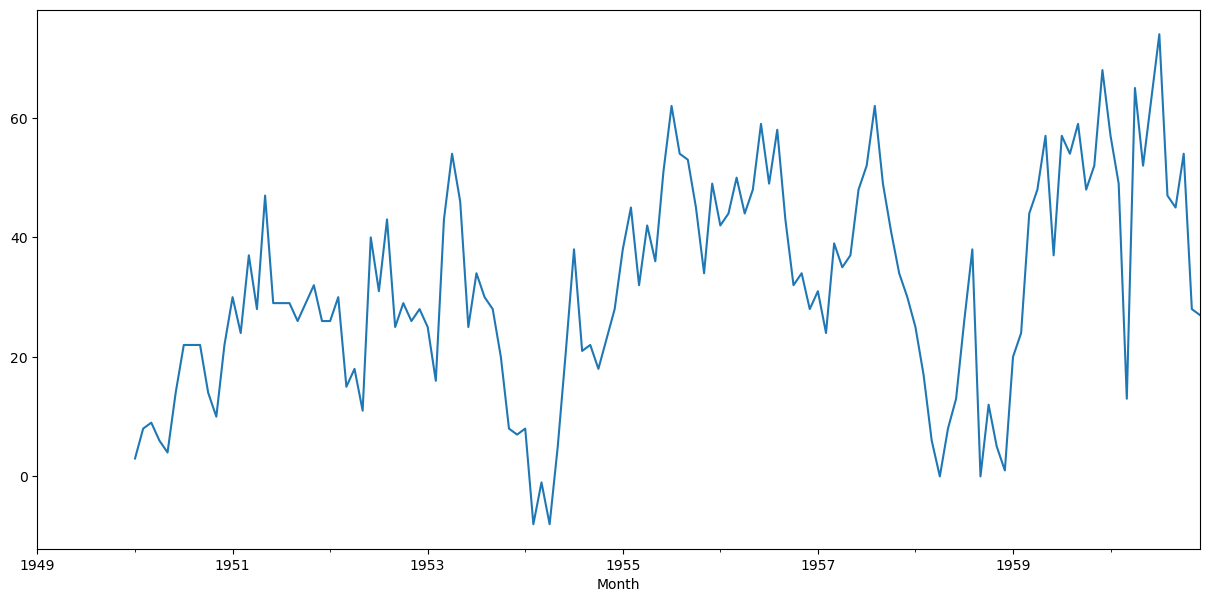

In [28]:
data['Seasonal_Difference'] = data['Passengers'] - data['Passengers'].shift(12)

plt.figure(figsize = (15, 7))
ax = data['Seasonal_Difference'].plot()

In [29]:
adf_test(data['Seasonal_Difference'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -3.383021
p-value                          0.011551
#Lags Used                       1.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


**Nhận xét:** `p-value` = 0.011 < 0.05. Do đó, chuỗi dừng. Điều đó gợi ý sử dụng 0 cho giá trị D (**D = 0**).

### Autocorrelation and Partial Autocorrelation Plots (p,q and P,Q parameters)
Bước cuối cùng trước khi mô hình ARIMA là tạo biểu đồ Autocorrelation và Partial Autocorrelation một phần để giúp chúng tôi ước tính các tham số p, q, P và Q.

Có một số quy tắc rất hữu ích cho mô hình ARIMA và ARIMA theo mùa mà chúng tôi đang sử dụng để giúp chúng tôi ước tính các tham số bằng cách xem biểu đồ Autocorrelation và Partial Autocorrelation. Chúng tôi sẽ tạo các biểu đồ cho sự khác biệt thứ hai và sự khác biệt theo mùa của chuỗi thời gian của chúng tôi vì đây là chuỗi tĩnh mà chúng tôi sẽ sử dụng trong ARIMA (d=2, D=0).

Đầu tiên, hãy vẽ đồ thị ACF và PACF cho sai phân bậc 2.

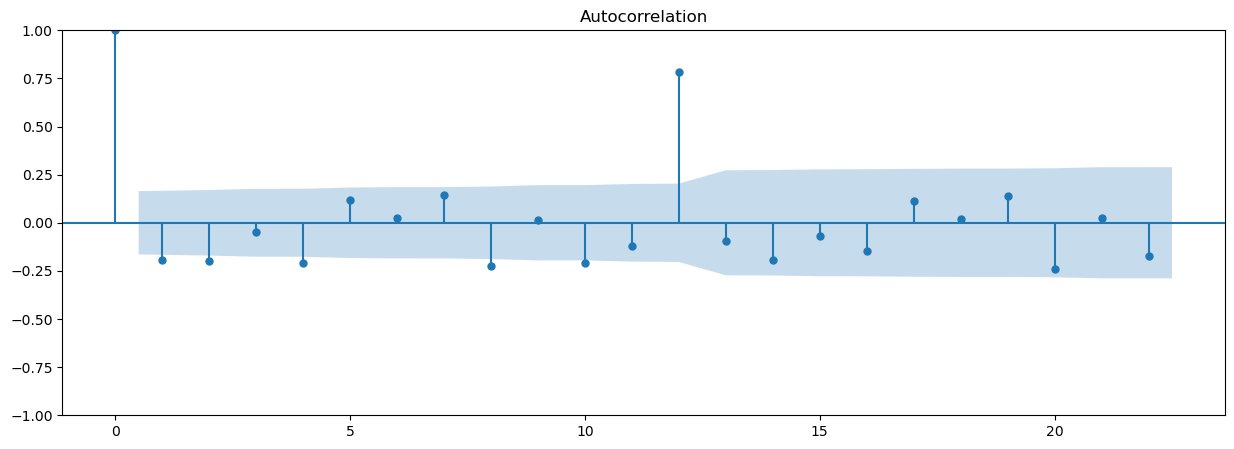

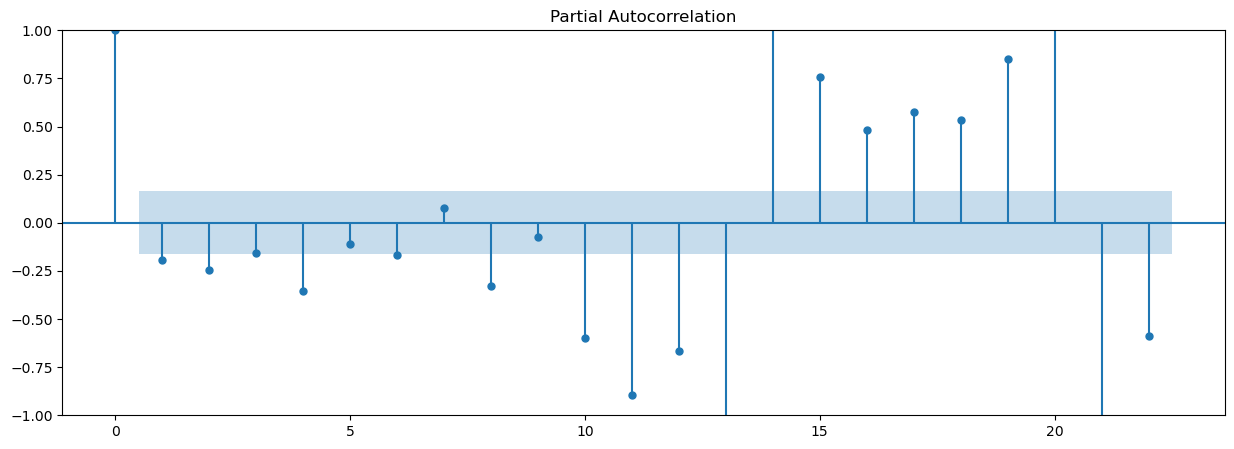

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig1 = plot_acf(data['difference2'].dropna()) 
fig2 = plot_pacf(data['difference2'].dropna()) 
fig1.set_size_inches(15, 5)
fig2.set_size_inches(15, 5)

**Nhận xét:** Chúng tôi có thể thấy rằng chúng tôi có một điểm cắt rõ ràng ở độ trễ-1 trong cả hai biểu đồ của chúng tôi. Theo các quy tắc chúng tôi đã đề cập ở trên, điều này gợi ý sử dụng thuật ngữ AR và MA. Nói cách khác, **p=2** và **q=2**.

Lưu ý: biểu đồ đi từ 0 chứ không phải 1.

### 3.3 Split Data into train and test <a class="anchor" id="133"></a>

In [31]:
# Dùng chuỗi gốc
# create train and split dataset
data_train = data.Passengers[:int (len(data.Passengers)*0.75)] #split dataset into 75/25%
data_test = data.Passengers[int(len(data.Passengers)*0.75):]

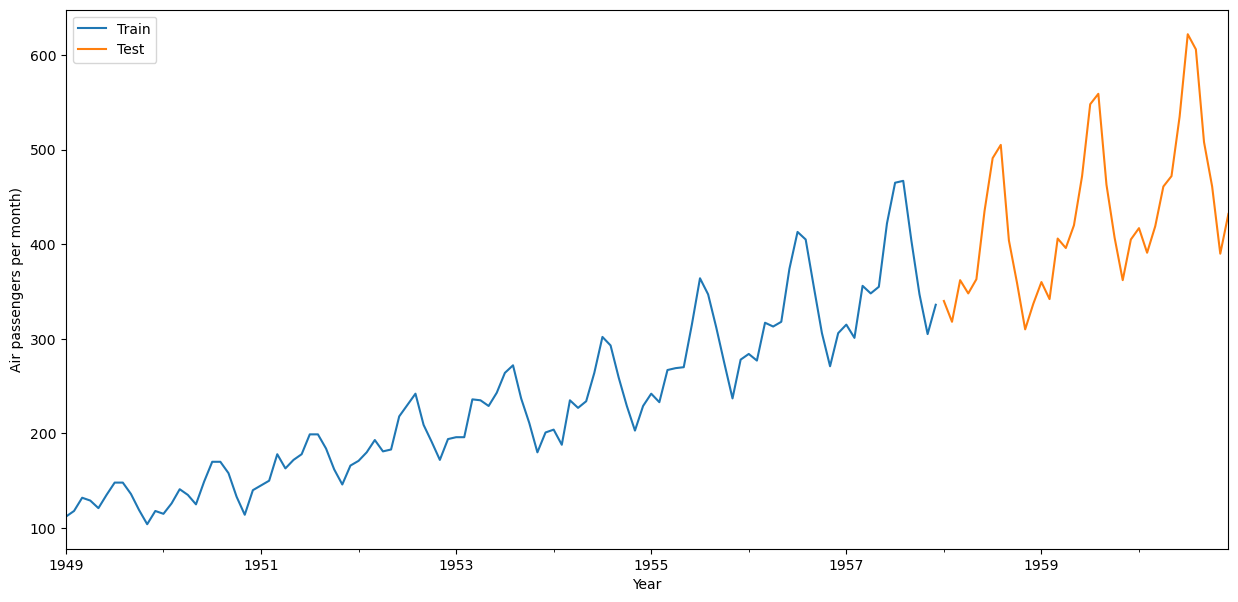

In [32]:
# Visualize split
fig, ax = plt.subplots(figsize=(15, 7))

data_train.plot(ax=ax)
data_test.plot(ax=ax)

plt.xlabel('Year')
plt.ylabel("Air passengers per month")
plt.legend(['Train','Test']);

## 4. Selection Models <a class="anchor" id="14"></a>
[**Table of Contents**](#0.2)

### 4.1 ARIMA Model <a class="anchor" id="141"></a>

In [33]:
# Build the ARIMA model
from statsmodels.tsa.arima.model import ARIMA

ARIMA_model = ARIMA(data_train, order=(2,1,2))
model_fit = ARIMA_model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  108
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -486.916
Date:                Sun, 12 Feb 2023   AIC                            983.832
Time:                        00:22:18   BIC                            997.196
Sample:                    01-01-1949   HQIC                           989.250
                         - 12-01-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3899      0.144      2.715      0.007       0.108       0.671
ar.L2          0.1415      0.192      0.737      0.461      -0.235       0.518
ma.L1         -0.0980      0.113     -0.869      0.3

/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/envs/lucas/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


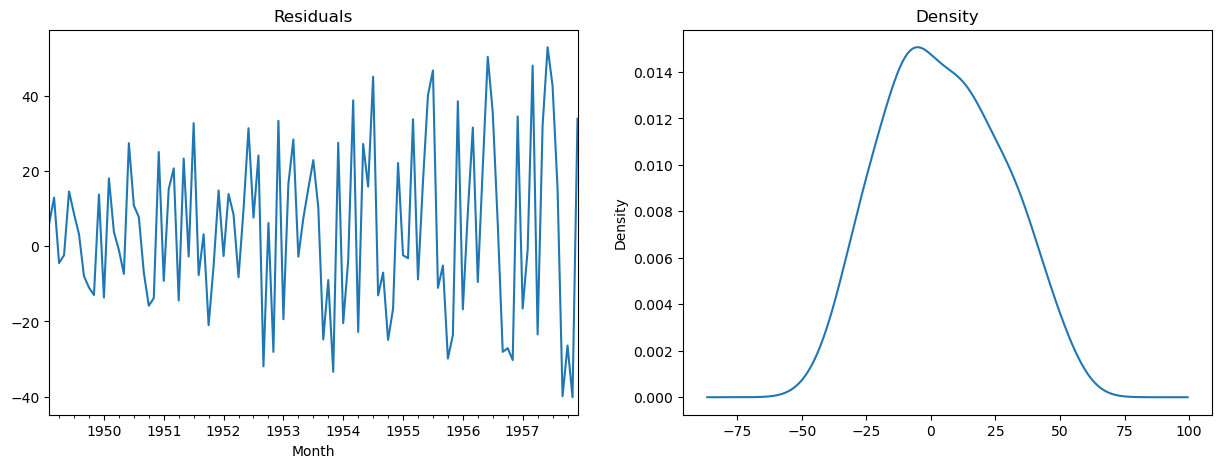

In [34]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2, figsize=(15,5))
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

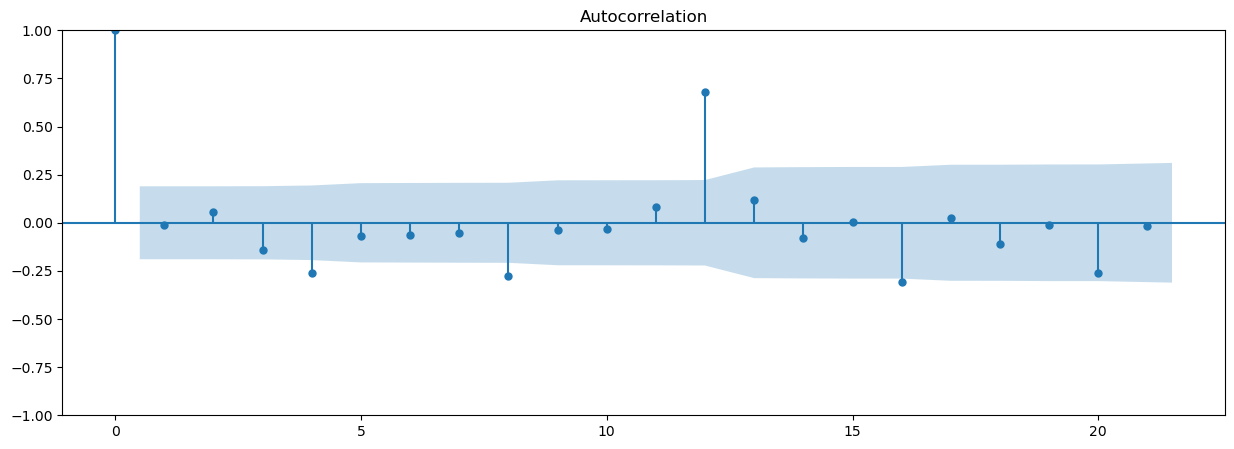

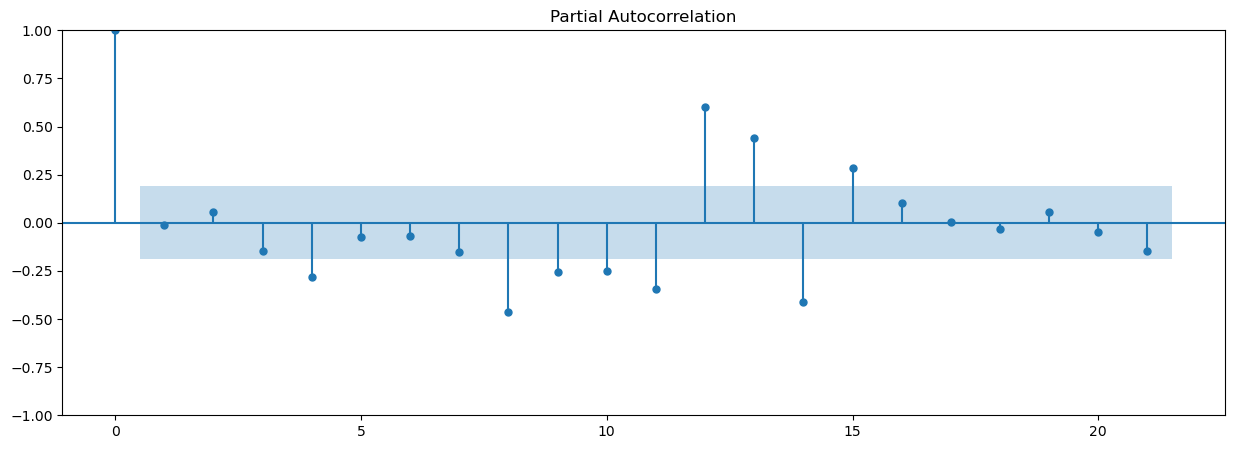

In [35]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)
acf_res.set_size_inches(15, 5)
pacf_res.set_size_inches(15, 5)

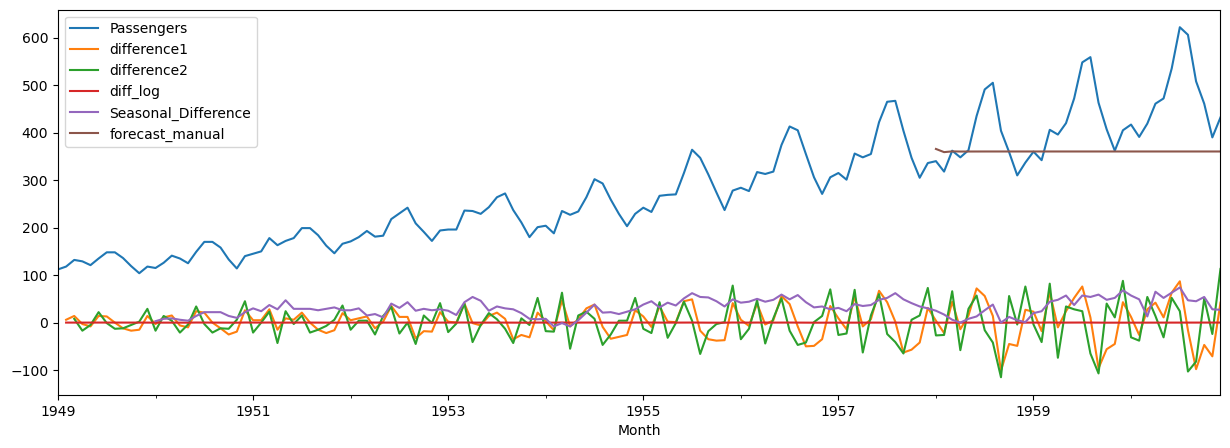

In [36]:
forecast_test = model_fit.forecast(len(data_test))
data['forecast_manual'] = [None]*len(data_train) + list(forecast_test)
data.plot(figsize=(15,5));

In [37]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(data_test, forecast_test)
mape = mean_absolute_percentage_error(data_test, forecast_test)
rmse = np.sqrt(mean_squared_error(data_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 77.63392771296404
mape - manual: 0.16155194014074511
rmse - manual: 103.76641184672975


### 4.2 Auto ARIMA Model <a class="anchor" id="142"></a>

### 4.2.1 Running ARIMA model <a class="anchor" id="1421"></a>

In [38]:
import pmdarima as pm
# use autoarima to obtain values of p,d, and q
autoARIMA_model = pm.auto_arima(data_train, # data
                                start_p=1, # initial guess for p
                                start_q=1, # initial guess for q
                                max_p=4, # max value for p to test
                                max_q=4, # max value for q to test
                                test='adf', # use adftest to find optimal 'd'
                                m=12, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                                d=1, # non-seasonal difference order
                                seasonal=False, # is the time series non-seasonal
                                trace=True, # print results whilst training
                                D=0, 
                                error_action='ignore',  # ignore orders that don't work
                                suppress_warning=True,
                                stepwise=True) # apply intelligent order search

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=988.670, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1002.826, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=996.373, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=991.646, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1001.531, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=989.104, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=991.749, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=959.218, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2

In [39]:
print(autoARIMA_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -473.609
Date:                Sun, 12 Feb 2023   AIC                            959.218
Time:                        00:22:20   BIC                            975.255
Sample:                    01-01-1949   HQIC                           965.719
                         - 12-01-1957                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.6708      0.207      3.235      0.001       0.264       1.077
ar.L1          1.6405      0.044     37.563      0.000       1.555       1.726
ar.L2         -0.9086      0.034    -26.746      0.0

### 4.2.2 Model Diagnostics - Chẩn đoán mô hình <a class="anchor" id="1422"></a>
Bốn ô là kết quả của hàm `plot_diagnostics`. Phần dư đã chuẩn hóa (Standardized residual), Histogram cộng với KDE estimate, Normal q-q và biểu đồ tương quan.

Chúng ta có thể giải thích mô hình là phù hợp tốt dựa trên các điều kiện sau.

**Standardized residual**
+ Không có mẫu rõ ràng trong phần dư, với các giá trị có giá trị trung bình bằng 0 và có phương sai đồng nhất.

**Histogram plus KDE estimate**
+ Đường cong KDE phải rất giống với phân phối chuẩn (được gắn nhãn là N(0,1) trong biểu đồ)

**Normal Q-Q**
+ Hầu hết các điểm dữ liệu phải nằm trên đường thẳng

**Correlogram (ACF plot)**
+ 95% tương quan cho độ trễ lớn hơn 0 không đáng kể. Vùng màu xám là khoảng tin cậy và nếu các giá trị nằm ngoài khoảng này thì chúng có ý nghĩa thống kê. Trong trường hợp của chúng tôi, có một vài giá trị nằm ngoài khu vực này và do đó chúng tôi có thể cần thêm nhiều yếu tố dự đoán hơn để làm cho mô hình chính xác hơn.

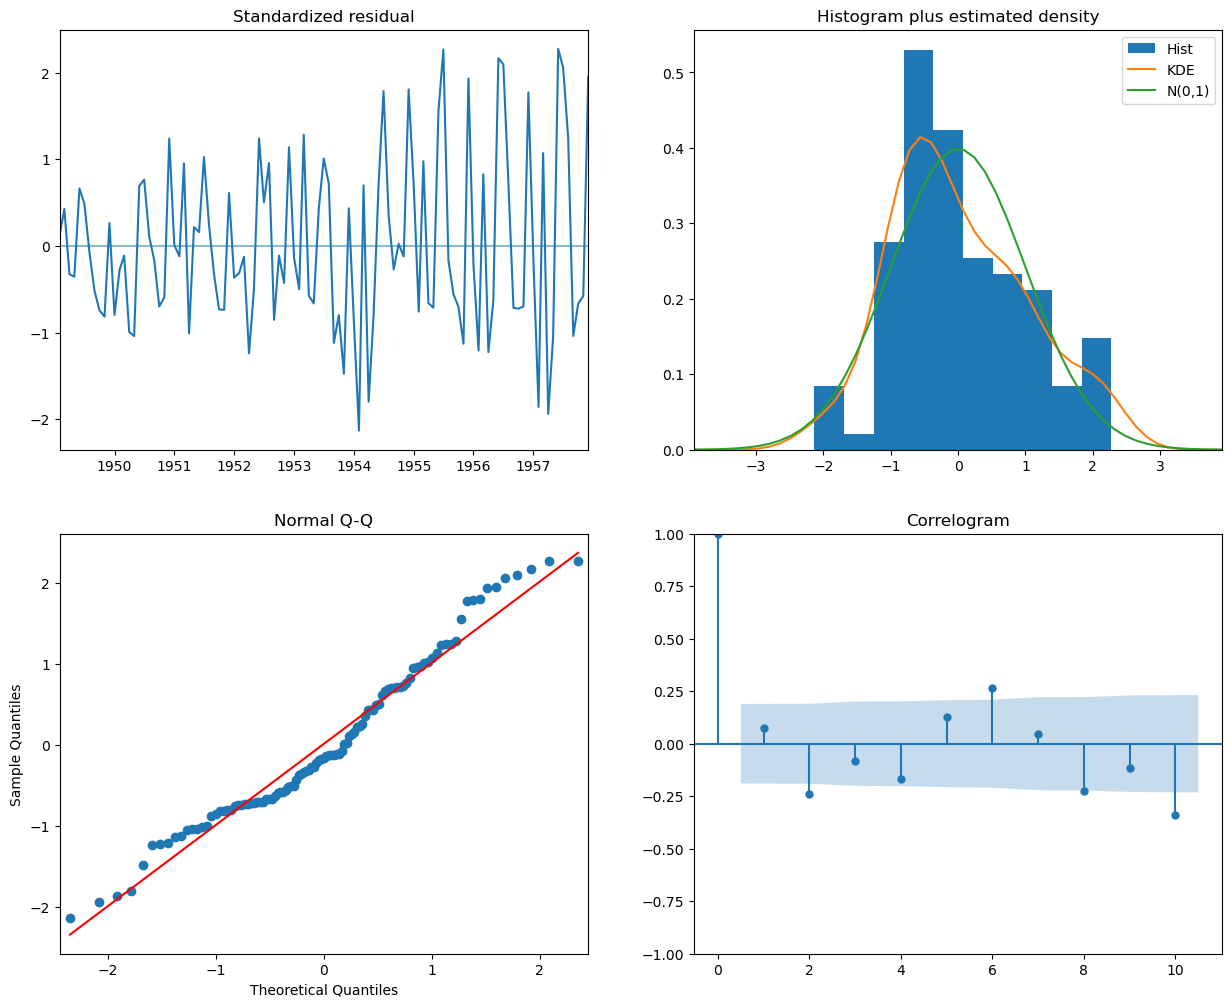

In [40]:
autoARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

**Nhận xét:** Bốn biểu đồ trên được diễn giải như sau;
+ **Vị trí (0, 0)**: Các residual errors dường như dao động quanh giá trị trung bình bằng 0 và có phương sai đồng nhất.
+ **Vị trí (0, 1)**: Biểu đồ mật độ đề xuất phân phối chuẩn với giá trị trung bình bằng 0.
+ **Vị trí (1, 0)**: Tất cả các dấu chấm phải nằm hoàn toàn thẳng hàng với đường màu đỏ. Bất kỳ sai lệch đáng kể nào cũng có nghĩa là phân phối bị sai lệch.
+ **Vị trí (1, 1)**: Biểu đồ ACF cho thấy các lỗi còn lại không tự tương quan. Các giá trị tương đối dưới dòng ý nghĩa. Bất kỳ sự tự tương quan nào cũng có nghĩa là có một số mẫu trong sai số dư không được giải thích trong mô hình. Vì vậy, bạn sẽ cần tìm thêm X (các yếu tố dự báo) cho mô hình.

### 4.2.3 Measure Model Accuracy <a class="anchor" id="1423"></a>

In [41]:
# Create forecast
def forecasts(model, actual):
    fc, conf = model.predict(n_periods = len(actual), return_conf_int = True)
    fc_series = pd.Series(fc, index = data_test.index)
    lower_bound = pd.Series(conf[:,0], index = actual.index)
    upper_bound = pd.Series(conf[:,1], index = actual.index)
    # plot
    plt.figure(figsize=(15, 7))
    plt.plot(data.Passengers)
    plt.plot(actual, color='orange', label='actual')
    plt.plot(fc_series, color='green', label='Forecasts')
    plt.fill_between(lower_bound.index, lower_bound, upper_bound, color='k',alpha=.15)
    plt.legend(loc = 'upper left')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.title("Forecast of AirPassengers")
    plt.show();

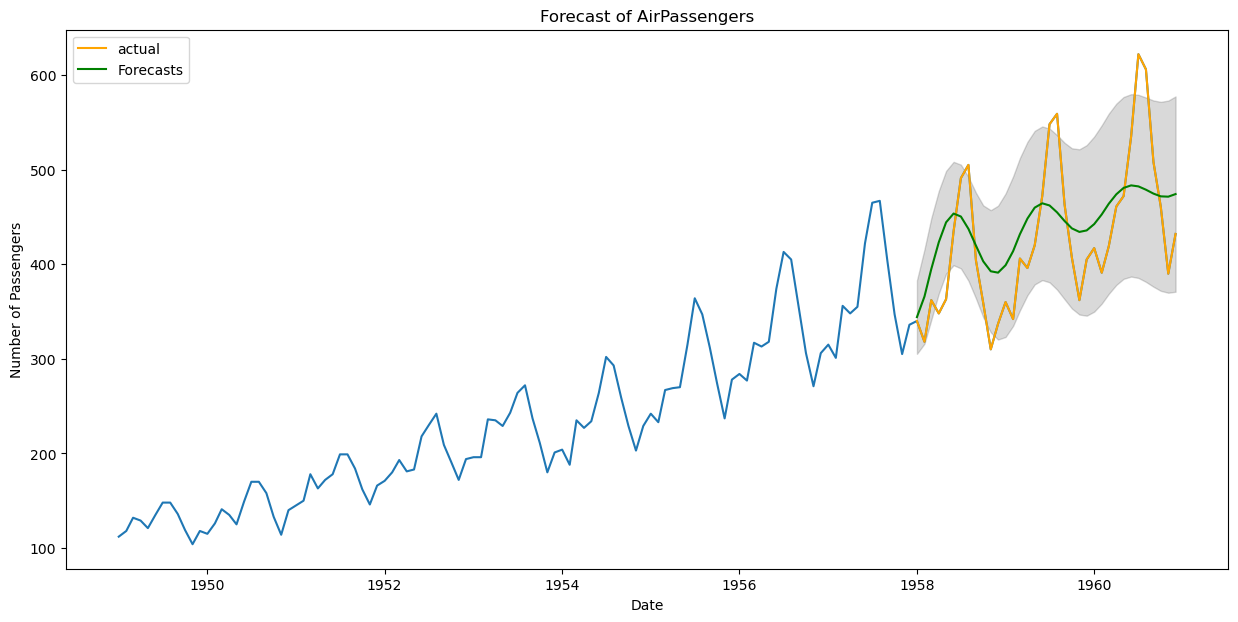

In [42]:
forecasts(autoARIMA_model, data_test)

In [43]:
from statsmodels.tsa.stattools import acf, pacf
from sklearn.metrics import mean_squared_error

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    RMSE = np.mean((forecast - actual)**2)**.5 # Root Mean Squared Error
    ME   = np.mean(forecast-actual) # Mean error
    MAE  = np.mean(np.abs(forecast - actual)) # Mean Absolute Error
    MAPE = np.mean(np.abs(forecast - actual)/np.abs(actual)) # Mean Absolute Percentage error
    MPE  = np.mean((forecast - actual)/actual) # Mean percentage error
    acf_error = acf(forecast - actual)[1] # Lag 1 Autocorrelationn Error
    MSE  = mean_squared_error(actual, forecast) # Mean squared error
    corr = np.corrcoef(forecast, actual)[0,1] # Correlation
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)  # MinMax
    
    df_performance = pd.Series([RMSE, ME, MAE, MAPE, MPE, acf_error, corr, MSE, minmax],
                             index=['Root Mean Squared Error', 
                                    'Mean Error',
                                    'Mean Absolute Error',
                                    'Mean Absolute Percentage Error',
                                    'Mean Percentage Error',
                                    'Lag 1 Autocorrelationn Error',
                                    'Correlation',
                                    'Mean Squared Error',
                                    'MinMax'])
    return df_performance

In [44]:
fc, conf = autoARIMA_model.predict(n_periods = len(data_test), return_conf_int = True)
forecastArima_series = pd.Series(fc, index = data_test.index)
forecast_accuracy(forecastArima_series, data_test)

Root Mean Squared Error             59.206172
Mean Error                          11.984772
Mean Absolute Error                 49.488304
Mean Absolute Percentage Error       0.116542
Mean Percentage Error                0.049331
Lag 1 Autocorrelationn Error         0.665656
Correlation                          0.737414
Mean Squared Error                3505.370815
MinMax                               0.105389
dtype: float64

**Nhận xét:** MAPE của mô hình là 11%. Độ chính xác của mô hình là không đủ tốt. Mặt khác, tương quan là 0,73. Mặc dù cao, nó không phải là hoàn hảo. Mô hình có thể hoạt động kém vì chúng tôi không xem xét tính thời vụ. Trong phần tiếp theo, chúng ta sẽ xây dựng mô hình SARIMA có tính đến tính thời vụ trong chuỗi thời gian.

**Cách khác để xem các chỉ số xác định độ chính xác của mô hình**

In [45]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(data_test, forecastArima_series)
mape = mean_absolute_percentage_error(data_test, forecastArima_series)
rmse = np.sqrt(mean_squared_error(data_test, forecastArima_series))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 49.48830366657752
mape - auto: 0.11654168011733929
rmse - auto: 59.20617209868507


### 4.2.4 Forecasting <a class="anchor" id="1424"></a>
**Dự báo cho 24 tháng tiếp theo**

In [46]:
future_forecast = autoARIMA_model.predict(n_periods = len(data_test) + 24)
future_forecast

1958-01-01    344.107632
1958-02-01    365.851622
1958-03-01    394.827373
1958-04-01    423.276600
1958-05-01    444.290999
1958-06-01    453.586702
1958-07-01    450.413008
1958-08-01    437.430839
1958-09-01    419.687655
1958-10-01    403.046189
1958-11-01    392.538170
1958-12-01    391.091235
1959-01-01    398.936275
1959-02-01    413.791908
1959-03-01    431.705653
1959-04-01    448.266260
1959-05-01    459.828280
1959-06-01    464.419442
1959-07-01    462.116552
1959-08-01    454.837689
1959-09-01    445.659747
1959-10-01    437.887649
1959-11-01    434.147463
1959-12-01    435.744377
1960-01-01    442.433461
1960-02-01    452.626953
1960-03-01    463.942624
1960-04-01    473.915037
1960-05-01    480.664133
1960-06-01    483.345789
1960-07-01    482.283482
1960-08-01    478.774892
1960-09-01    474.654983
1960-10-01    471.754969
1960-11-01    471.411702
1960-12-01    474.154435
1961-01-01    479.636711
1961-02-01    486.809256
1961-03-01    494.265501
1961-04-01    500.651325


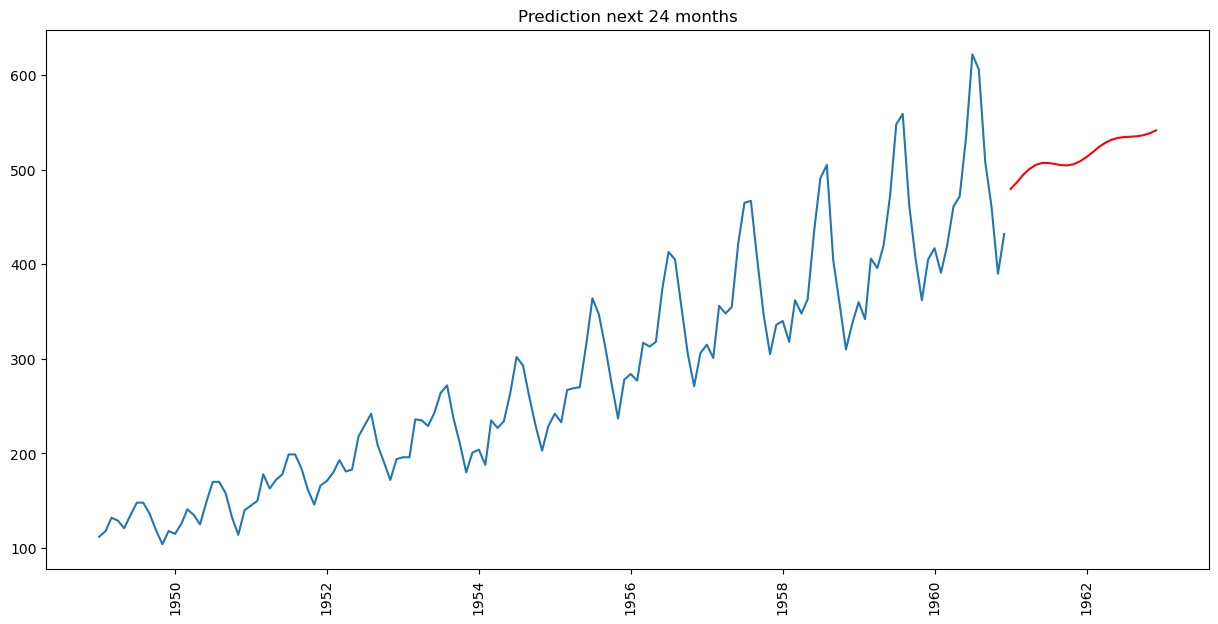

In [47]:
plt.figure(figsize=(15,7))
plt.plot(data['Passengers'])
plt.plot(future_forecast[len(data_test):], color='red')
plt.xticks(rotation='vertical')
plt.title('Prediction next 24 months')
plt.show();

### 4.3 SARIMA Model <a class="anchor" id="143"></a>

### 4.3.1 Running SARIMA model <a class="anchor" id="1431"></a>

In [48]:
SARIMA_model = pm.auto_arima(data_train, # data
                                start_p=1, # initial guess for p
                                start_q=1, # initial guess for q
                                max_p=4, # max value for p to test
                                max_q=4, # max value for q to test
                                test='adf', # use adftest to find optimal 'd'
                                m=12, # frequency of series (if m==1, seasonal is set to FALSE automatically)
                                d=1, # non-seasonal difference order
                                seasonal=True, # is the time series non-seasonal
                                trace=True, # print results whilst training
                                D=0, 
                                error_action='ignore',  # ignore orders that don't work
                                suppress_warning=True,
                                stepwise=True) # apply intelligent order search

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=824.195, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1002.826, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=922.955, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1001.531, Time=0.01 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=924.793, Time=0.16 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=823.535, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=988.670, Time=0.04 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=824.003, Time=1.65 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=825.898, Time=2.07 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=822.854, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=991.646, Time=0.03 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=823.089, Time=1.18 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=823.278, Time=0.19 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept 

In [49]:
print(SARIMA_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  108
Model:             SARIMAX(0, 1, 4)x(2, 0, [], 12)   Log Likelihood                -401.141
Date:                             Sun, 12 Feb 2023   AIC                            816.282
Time:                                     00:22:57   BIC                            834.992
Sample:                                 01-01-1949   HQIC                           823.867
                                      - 12-01-1957                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1877      0.097     -1.929      0.054      -0.378       0.003
ma.L2          0.0311      

### 4.3.2 Model Diagnostics - Chẩn đoán mô hình <a class="anchor" id="1432"></a>

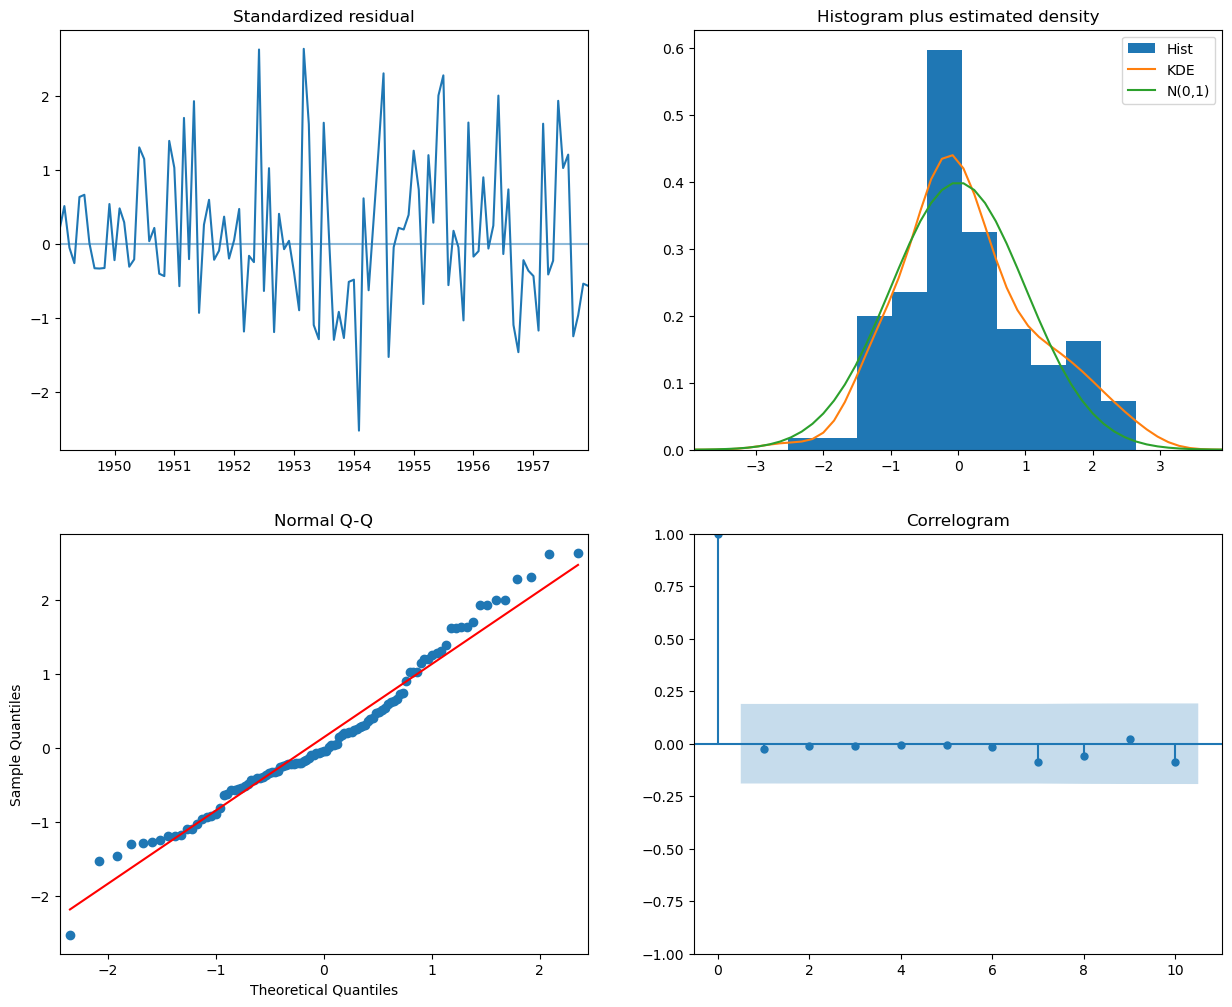

In [50]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show();

**Nhận xét:** Bốn biểu đồ trên được diễn giải như sau;
+ **Vị trí (0, 0)**: Các residual errors dường như dao động quanh giá trị trung bình bằng 0 và có phương sai đồng nhất.
+ **Vị trí (0, 1)**: Biểu đồ mật độ đề xuất phân phối chuẩn với giá trị trung bình bằng 0.
+ **Vị trí (1, 0)**: Tất cả các dấu chấm phải nằm hoàn toàn thẳng hàng với đường màu đỏ. Bất kỳ sai lệch đáng kể nào cũng có nghĩa là phân phối bị sai lệch.
+ **Vị trí (1, 1)**: Biểu đồ ACF cho thấy các lỗi còn lại không tự tương quan. Các giá trị tương đối dưới dòng ý nghĩa. Bất kỳ sự tự tương quan nào cũng có nghĩa là có một số mẫu trong sai số dư không được giải thích trong mô hình. Vì vậy, bạn sẽ cần tìm thêm X (các yếu tố dự báo) cho mô hình.

### 4.3.3 Measure Model Accuracy <a class="anchor" id="1433"></a>

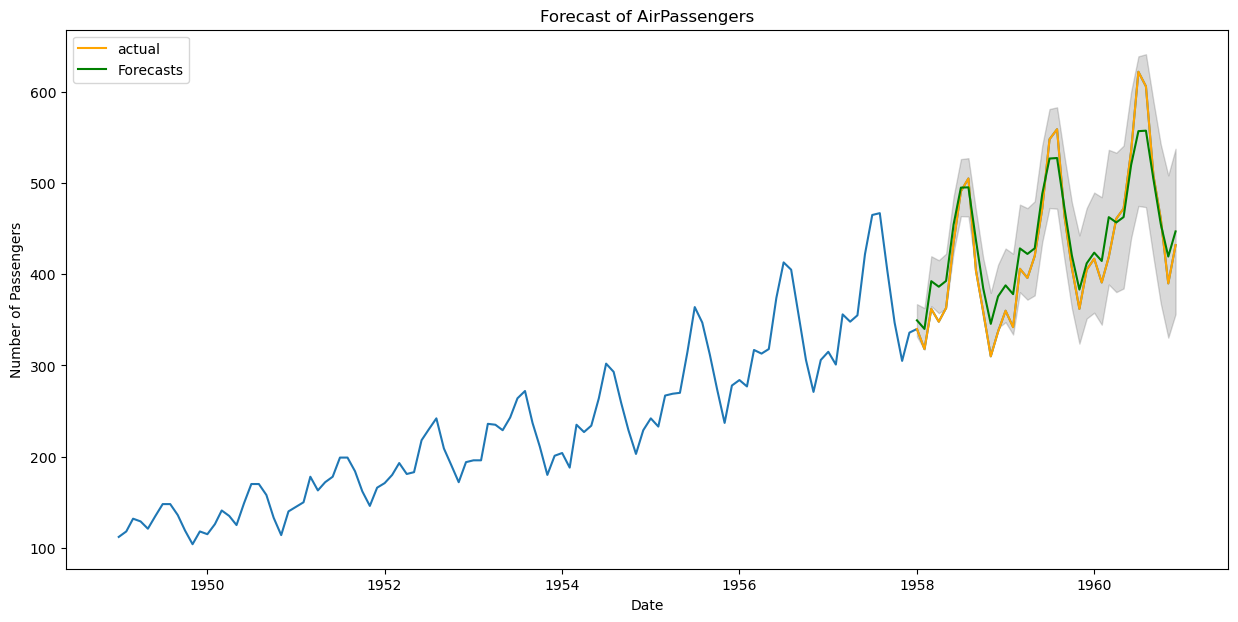

In [51]:
forecasts(SARIMA_model, data_test)

In [52]:
fc, conf = SARIMA_model.predict(n_periods = len(data_test),return_conf_int=True)
forecastArima_series = pd.Series(fc, index = data_test.index)
forecast_accuracy(forecastArima_series,data_test)

Root Mean Squared Error            26.488946
Mean Error                         10.511807
Mean Absolute Error                22.421181
Mean Absolute Percentage Error      0.054544
Mean Percentage Error               0.033637
Lag 1 Autocorrelationn Error        0.615627
Correlation                         0.982193
Mean Squared Error                701.664242
MinMax                              0.051358
dtype: float64

**Nhận xét:** MAPE cho mô hình là 5,45%, nghĩa là nó chính xác 94,55%. Cái này tốt hơn cái trước. Ngoài ra, tương quan là 0,98. SARIMA được ưu tiên khi làm việc với chuỗi thời gian có tính thời vụ. Bạn không cần phải đặt chuỗi thời gian cố định trong khi sử dụng mô hình.

### 4.3.4 Forecasting <a class="anchor" id="1434"></a>
**Dự báo cho 24 tháng tiếp theo**

In [53]:
future_forecast = SARIMA_model.predict(n_periods = len(data_test) + 24)
future_forecast

1958-01-01    349.472210
1958-02-01    340.064802
1958-03-01    392.407962
1958-04-01    386.346487
1958-05-01    392.693106
1958-06-01    454.698702
1958-07-01    494.966554
1958-08-01    495.321645
1958-09-01    437.428765
1958-10-01    384.467674
1958-11-01    345.614653
1958-12-01    375.709606
1959-01-01    387.827964
1959-02-01    378.172649
1959-03-01    428.353984
1959-04-01    422.290624
1959-05-01    428.426352
1959-06-01    488.156731
1959-07-01    526.867921
1959-08-01    527.459962
1959-09-01    471.622721
1959-10-01    420.640075
1959-11-01    383.210017
1959-12-01    411.965739
1960-01-01    423.697852
1960-02-01    414.555450
1960-03-01    462.604656
1960-04-01    456.839610
1960-05-01    462.706375
1960-06-01    519.852816
1960-07-01    556.902056
1960-08-01    557.428350
1960-09-01    504.017655
1960-10-01    455.234884
1960-11-01    419.424485
1960-12-01    446.973953
1961-01-01    458.189154
1961-02-01    449.416785
1961-03-01    495.434068
1961-04-01    489.906244


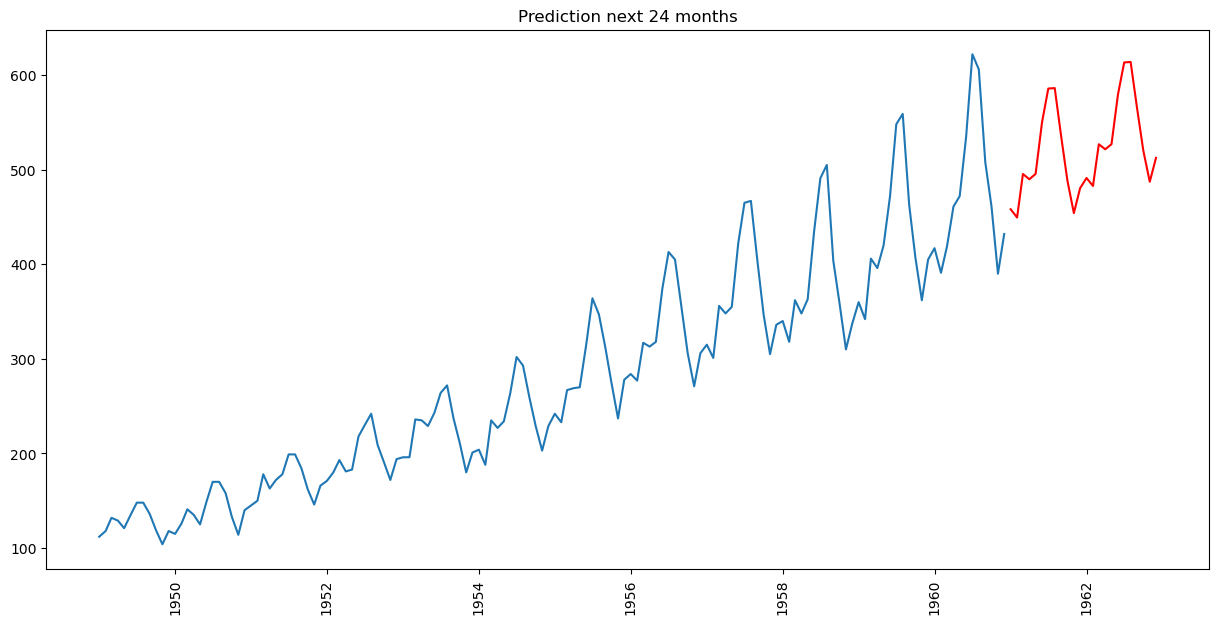

In [54]:
plt.figure(figsize=(15,7))
plt.plot(data['Passengers'])
plt.plot(future_forecast[len(data_test):], color='red')
plt.xticks(rotation='vertical')
plt.title('Prediction next 24 months')
plt.show();

### 4.4 ARIMAX and SARIMAX Models <a class="anchor" id="144"></a>

Bây giờ hãy thực hành thêm một biến ngoại sinh. Trong ví dụ này, tôi chỉ đơn giản là thêm số tháng dưới dạng một biến ngoại sinh, nhưng điều này không quá hữu ích vì điều này đã được chuyển tải thông qua tính thời vụ.

Lưu ý rằng chúng tôi đang thêm các dấu ngoặc vuông xung quanh dữ liệu được chuyển vào mô hình SARIMAX.

In [55]:
# adding exogenous variable
data['month_index'] = data.index.month

# SARIMAX Model
SARIMAX_model = pm.auto_arima(data[['Passengers']], 
                              exogenous=data[['month_index']],
                              start_p=1, 
                              start_q=1,
                              test='adf',
                              max_p=3, 
                              max_q=3, 
                              m=12,
                              start_P=0, 
                              seasonal=True,
                              d=None, 
                              D=1, 
                              trace=False,
                              error_action='ignore',  
                              suppress_warnings=True, 
                              stepwise=True)

print(SARIMAX_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Sun, 12 Feb 2023   AIC                           1019.178
Time:                                     00:23:56   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      

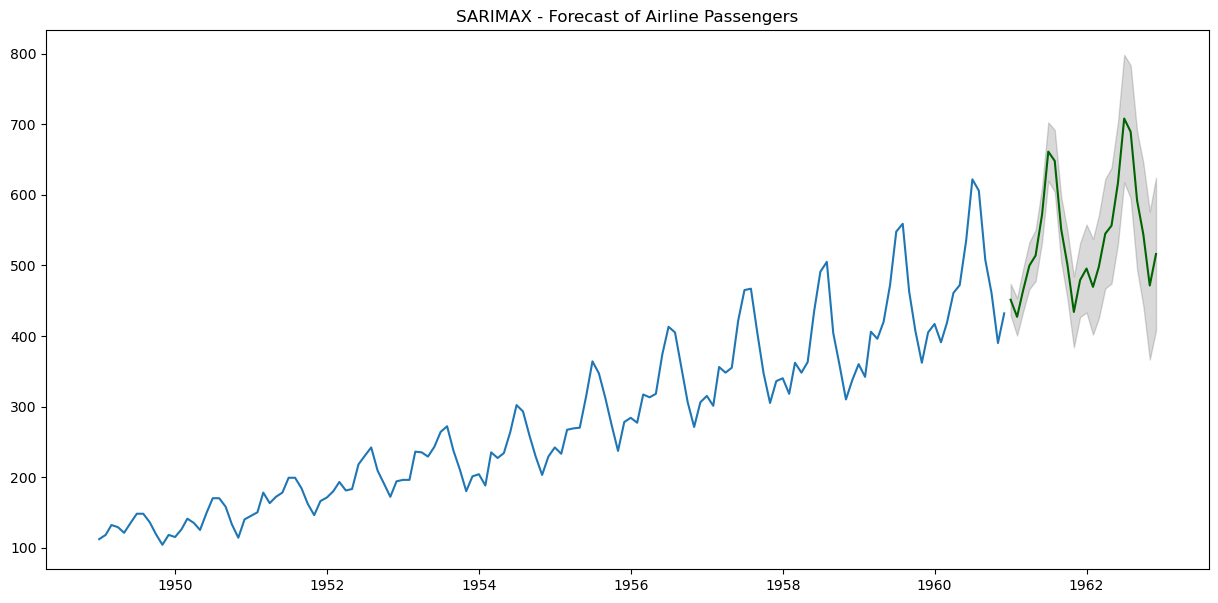

In [56]:
def sarimax_forecast(SARIMAX_model, periods=24):
    # Forecast
    n_periods = periods

    forecast_df = pd.DataFrame({"month_index":pd.date_range(data.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(data.index[-1]+ pd.DateOffset(months=1), periods = n_periods, freq='MS'))

    fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])
    index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot
    plt.figure(figsize=(15,7))
    plt.plot(data["Passengers"], color='#1f76b4')
    plt.plot(fitted_series, color='darkgreen')
    plt.fill_between(lower_series.index, 
                    lower_series, 
                    upper_series, 
                    color='k', alpha=.15)

    plt.title("SARIMAX - Forecast of Airline Passengers")
    plt.show()

sarimax_forecast(SARIMAX_model, periods=24)

In [57]:
# View predict value
n_periods = 24

forecast_df = pd.DataFrame({"month_index":pd.date_range(data.index[-1], periods = n_periods, freq='MS').month},
                    index = pd.date_range(data.index[-1]+ pd.DateOffset(months=1), periods = n_periods, freq='MS'))

fitted, confint = SARIMAX_model.predict(n_periods=n_periods, 
                                            return_conf_int=True,
                                            exogenous=forecast_df[['month_index']])

index_of_fc = pd.date_range(data.index[-1] + pd.DateOffset(months=1), periods = n_periods, freq='MS')

fitted_series = pd.Series(fitted, index=index_of_fc)
fitted_series

1961-01-01    451.347077
1961-02-01    427.102222
1961-03-01    463.382490
1961-04-01    499.705771
1961-05-01    514.035525
1961-06-01    571.851867
1961-07-01    661.310508
1961-08-01    648.081675
1961-09-01    551.284691
1961-10-01    501.068279
1961-11-01    434.052984
1961-12-01    479.233768
1962-01-01    495.569171
1962-02-01    469.578456
1962-03-01    497.955024
1962-04-01    544.916438
1962-05-01    556.350007
1962-06-01    616.910052
1962-07-01    708.165787
1962-08-01    689.435153
1962-09-01    592.107043
1962-10-01    544.008548
1962-11-01    471.532194
1962-12-01    516.127935
Freq: MS, dtype: float64

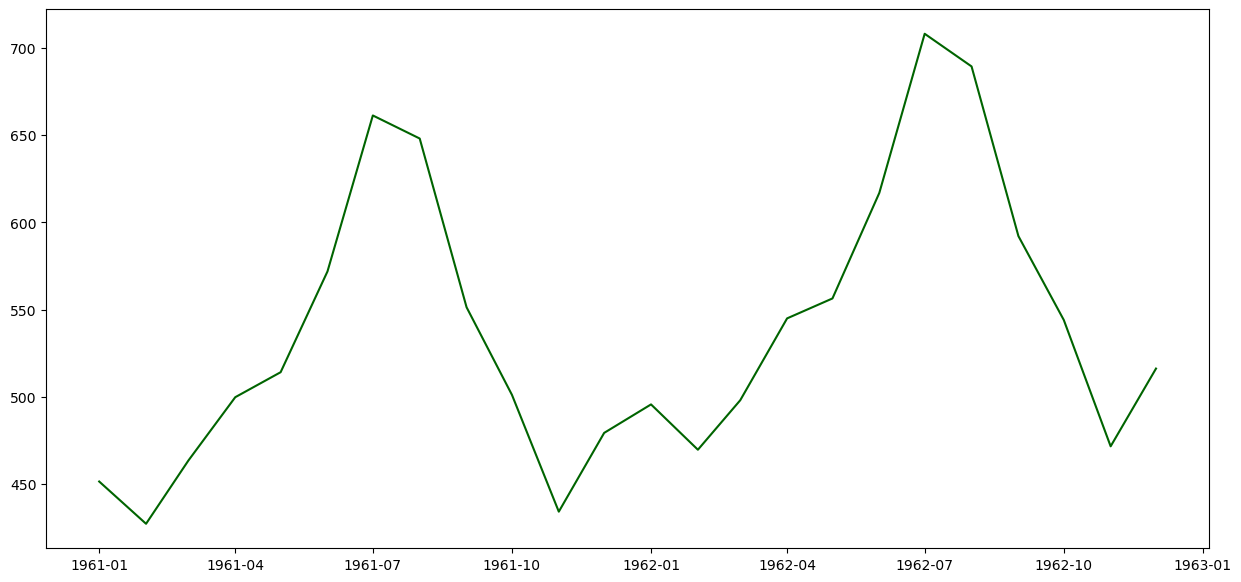

In [58]:
plt.figure(figsize=(15, 7))
plt.plot(fitted_series, color='darkgreen');  

## 5. Conclusion <a class="anchor" id="15"></a>
[**Table of Contents**](#0.2)

Như vậy tôi đã giới thiệu tới các bạn từ lý thuyết đến thực hành các mô hình ARIMA và SARIMA áp dụng trong các bài toán dự báo chuỗi thời gian. Đây là những lớp mô hình phổ biến và có độ chính xác cao không thua kém gì những mô hình deep learning như LSTM, CNN. Thậm chí một số trường hợp còn cho độ chính xác cao hơn. Tuy nhiên mọi sự so sánh đều chỉ là tương đối, tùy vào bài toán và tùy vào dữ liệu mà chúng ta sẽ cần phải lựa chọn phương pháp phù hợp. Hoặc thậm chí là thử nghiệm nhiều phương pháp khác nhau. Về nội dung của bài viết tôi hi vọng các bạn nắm được:
+ Đặc trưng của một mô hình ARIMA thông qua các quá trình tự hồi qui, trung bình trượt và đồng tích hợp.
+ Các yêu cầu về tính dừng, tính nhiễu trắng của sai số ngẫu nhiên trước khi thực hiện một mô hình hồi qui ARIMA.
+ Tiêu chuẩn và chiến lược lựa chọn các mô hình ARIMA phù hợp với bộ dữ liệu.
+ Dự báo và đánh giá kết quả dự báo từ mô hình.

### Saving model object

In [59]:
# # Select a filepath
# filepath = 'airpass_model.pkl'

# # Save model to filepath
# joblib.dump(pm_model, filepath)

# # Load model back in 
# airpass_model = joblib.load(filepath)

**<span style="color:#034235;"> Thanks for reading this post. </span>**

_______
_Make by_**<span style="color:#034235;"> Lucas,</span>**
### <p style="padding:5px;background-color:#034235;margin:0;color:#ffe7a0;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 20px;overflow:hidden;font-weight:900">END</p>
______
<img src="https://github.com/LeHongNgoc3820/Lucas_viet_Blog/blob/b5e2de5a812292889e793b719572d06f3ababf2d/Logo%20ta%CC%81ch%20ne%CC%82%CC%80n.png?raw=true"
     style="width:200px;height:200px;">

**<span style="color:#034235;"> You can contact with me on:</span>**
+ **Gmail**: lehongngoc.work@gmail.com
+ **GitHub**: [LeHongNgoc3820](https://github.com/LeHongNgoc3820)
+ **Linkedln**: [Ngoc Le Hong](https://www.linkedin.com/in/ngoc-le-hong-44131b21a/)